# Bayesian inference for iSCAT

This notebook covers the development of a Bayesian inference method for the analysis of data obtained from the interferometric scattering microscopy set-up iSCAT.

## Generative model

### Rayleigh scattering

We focus on the Rayleigh scattering regime that is appliciable to scatterers that are much smaller than the wavelength of the radiated light. The scattered field $\mathbf{E}_\textrm{sca}(r)$ in the far-field limit at a distance $r$ is given by (Bohren & Huffman, 1983)

$$ \mathbf{E}_\textrm{sca}(r) = \mathbf{E}_\textrm{inc} \frac{2\sqrt{2}\pi^2 \alpha}{(\lambda/n_m)^2 r}e^{i n_m k r}\sqrt{1+\cos^2\theta}, \tag{1}$$

where $\mathbf{E}_\textrm{inc}$ is the incident light and $\alpha$ is the polarizability of the particle. Furthermore, $\lambda$ is the wavelength of the light (wavenumber $k=2\pi/\lambda$), $n_m$ is the refractive index of the medium in which the scatterer resides and $\theta$ represents the scattering angle. The (possibly complex) polarizability is proportial to the volume of the particle and is given by

$$ \alpha= a^3 \left(\frac{n_p^2 - n_m^2}{n_p^2+2n_m^2}\right), \tag{2}$$

where $a$ is the radius of the particle and $n_p$ denotes the refractive index of the particle.

### Lensless interference

When the spherical wave coming from the scatterer interferes with the planar reference wave, this results in an interference pattern on the detector as a result of the optical path difference between the scattered wave and the reference wave.

We consider a lensless model with the principal underlying assumption that the image is translated one-to-one from the focal plane to the camera. This neglects any aberations induced by the optical train and, perhaps more notably, this limits the support of the model to the case where the particle resides above the focal plane. See Figure 1 of our paper. 

As a first approximation, we consider a reference beam that is aligned with the optical axis and has a constant intensity profile. A large fraction of the beam is transmitted through the coverslip and illuminates the scatterer as $\mathbf{E}_\textrm{inc}$. A small fraction of the beam, however, is reflected at the coverslip and travels to the detector, interfering with the scattered field. We refer to the reflected wave as $\mathbf{E}_\textrm{ref}$.

We can then readily define a coordinate system $(x,y,z)$ with the origin on the detector and the $z$-axis aligned with the optical axis. The intensity profile $I(x,y)$ of the interference pattern that is captures by the detector is then

$$ I(x,y) = |\mathbf{E}_\textrm{ref}(z_f)+\mathbf{E}_\textrm{sca}(x,y,z_f)|^2 = E_\textrm{ref}^2 + E_\textrm{sca}^2 + 2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}, \tag{3}$$

where $\phi_\textrm{dif}$ represents the phase difference between $\mathbf{E}_\textrm{ref}$ and $\mathbf{E}_\textrm{sca}$. Note that on the right hand side we omitted the arguments $(x,y,z_f)$ for brevity.

From this image, we subtract the contribution of the reference beam $E_\textrm{ref}^2$ and normalize by it to find the point spread function

$$ \textrm{iPSF} = \frac{E_\textrm{sca}^2 + 2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}}{E_\textrm{ref}^2}. \tag{4} $$

The term $E_\textrm{sca}^2$ is often neglected as in most practical cases $E_\textrm{sca} \ll E_\textrm{ref}$ such that the interference term dominates. We will henceforth use the approximate iPSF as

$$ \textrm{iPSF} \approx \frac{2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}}{E_\textrm{ref}^2}. \tag{5} $$

The evaluation of the reference field at the focal plane is straightforward. Although this beam never reaches the focal plane physically, we can act as if it is coming from the focal plane, since it is a parallel beam. The phase factor then becomes $e^{i(\phi_\textrm{ref}-n_m k z_f)}$, where $\phi_\textrm{ref}$ represents any additional phase shift due to the Fresnel reflection. The amplitude of the field is constant $E_\textrm{ref}$.

The scattered field at the focal plane can be evaluated from equation (1) using $r=r_p\equiv\sqrt{(x-x_0)^2+(y-y_0)^2+(z_p-z_f)^2}$ with $(x_0,y_0)$ the horizontal position of the particle and using $\cos\theta=\frac{z_p-z_f}{r}$. Note furthermore that there is an additional phase factor $e^{i(n_m k z_p)}$ due to the optical path from the cover slip travelled by the incident light.

Combining this, we find

\begin{align}
E_\textrm{ref} &= E_\textrm{ref}, \\
E_\textrm{sca} &= E_\textrm{inc} \frac{2\sqrt{2}\pi^2 \alpha}{(\lambda/n_m)^2 r_p}\sqrt{1+\left(\frac{z_p-z_f}{r_p}\right)^2},\\
\phi_\textrm{dif} &= \left(\phi_\textrm{ref} - n_m k z_f\right) - \left(n_m k z_p + \textrm{arg}(\alpha) + n_m k r_p\right),\\
\textrm{with}\quad &r_p \equiv\sqrt{(x-x_0)^2+(y-y_0)^2+(z_p-z_f)^2}.
\end{align}

Many of the variables in these equations, however, can not be independently inferred from the $\textrm{iPSF}$. We thus reparametrize our model into:

- The particle position above the focal plane $z_p' \equiv z_p - z_f$
- The horizontal particle position $x_0,y_0$
- The lumped amplitude $\hat{E}_0 \equiv \frac{E_\textrm{inc}}{E_\textrm{ref}} \frac{4\sqrt{2}\pi^3\alpha}{(\lambda/n_m)^3}$
- The lumped phase $\phi_0 \equiv -\phi_\textrm{ref} + 2 n_m k z_f + \textrm{arg}(\alpha)$

And we assume $k$ (or $\lambda$) and $n_m$ are known exactly. This yields

\begin{align}
E_\textrm{ref} &= E_\textrm{ref}, \\
E_\textrm{sca} &= E_\textrm{ref}\hat{E}_0 \frac{1}{n_m k r_p}\sqrt{1+(z_p'/r_p)^2},\\
\phi_\textrm{dif} &= -(\phi_0 + n_m k z_p' + n_m k r_p),\\
\textrm{with}\quad &r_p \equiv\sqrt{(x-x_0)^2+(y-y_0)^2+z_p'^2}.
\end{align}

Finally, note that now $E_\textrm{sca} \sim E_\textrm{ref}$, such that also $E_\textrm{ref}$ drops out of equation (5). For completeness, this yields (with $r_p$ provided as above)

$$ \textrm{iPSF} = 2 \hat{E}_0 \frac{1}{n_m k r_p}\sqrt{1+(z_p'/r_p)^2} \cos (-(\phi_0 + n_m k z_p' + n_m k r_p)). \tag{6}$$

We are thus left with 5 free parameters of the model: the particle position (3D), the scattering strength, which is proportional to the particle volume and a net phase. This makes the model suitable for 3D tracking experiments, as well as for measurements of the particle size (polarizability), after calibration.

Below, this model is implemented in Python. Note that all distance usits are in nm.

In [1]:
#SOME GLOBAL IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import xarray as xr
import seaborn as sns
import h5py
from pathlib import Path

# Set to number of cores on your machine
CORES = 4
plt.rcParams['figure.figsize'] = [9.5, 6]

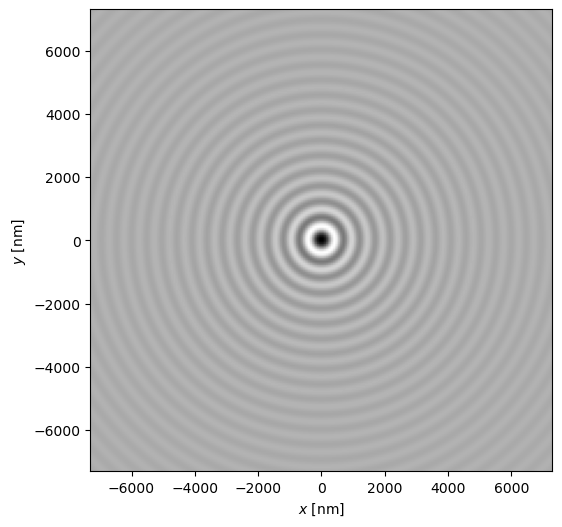

In [2]:
#DEFINE CONSTANTS
k = 2*np.pi/(635/1.33) #wavenumber in medium
fov = 14600 #size of field of view

#DEFINE MESH
def getMesh(xmin,xmax,ymin,ymax,nx=200,ny=200):
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)
    return np.meshgrid(x, y)

xv,yv = getMesh(-0.5,0.5,-0.5,0.5)
xv = xv*fov ; yv = yv*fov

#DEFINE iPSF
def iPSF_no_beam(xv, yv, k, x0, y0, zpp, E0, phi0):
    
    rpp = np.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to the focal plane
    cos_theta = zpp / rpp #cos of scattering angle
    phi_inc = k*zpp #phase shift due to incedent OPD, (note that influence of zf is lumped into phi0)
    phi_sca = k*rpp #phase shift due to return OPD
    fac = np.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
    Escat = E0*fac #scattering amplitude
    
    phi_diff=-(phi0+phi_inc+phi_sca) #phase difference
    
    iPSF = 2*Escat*np.cos(phi_diff)
    
    return iPSF

#AN EXAMPLE
iPSF = iPSF_no_beam(xv,yv,k,0,0,300,0.3,np.pi/2)

plt.figure()
plt.imshow(iPSF, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
plt.xlabel('$x$ [nm]')
plt.ylabel('$y$ [nm]')
plt.show()

NOTE: throughout this work, we adhere to the convention that in any 2D array the first axis represent the y-coordinate and the second axis represents the x-coordinate. This agrees with the convention used in the `imshow` and `meshgrid` functions in Python.

To assess the validity of this lensless model, we compare it to a more sophisiticated model for the iPSF as brought forward by Mahmoodabadi *et al.*, 2020 that includes a model for the full optical train.

We regard the results for a sweep of the focal plane by studying its influence on the cross-section of the iPSF.

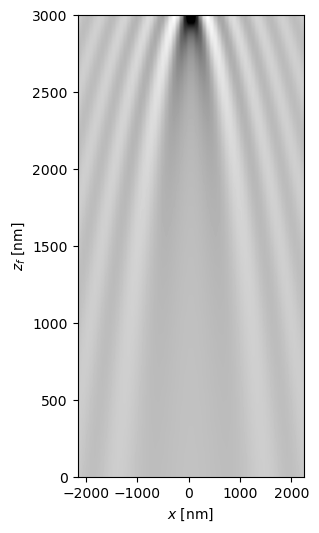

In [3]:
zp = 3000 #axial position of particle
zfs = np.linspace(0,zp,500) #axial positions of the focal plane
zpps = zp-zfs #axial positions of the particle w.r.t. the focal plane
phi0s = np.pi*1.5 + 2*k*zfs #phi0 given the location of zf

iPSF_zf_sweep = np.array([iPSF_no_beam(xv[100,70:130],yv[100,70:130], k, 0, 0, zpps[i], 0.3, phi0s[i]) for i in range(len(zfs))])

#PLOT
plt.figure()
plt.imshow(iPSF_zf_sweep, vmin=0.6*np.amin(iPSF_zf_sweep), cmap='gray', extent=[xv[100,70],xv[100,130], np.amin(zfs), np.amax(zfs)], origin='lower',aspect=3)
plt.xlabel('$x$ [nm]')
plt.ylabel('$z_f$ [nm]')
plt.show()

Comparing this result with the result in Mahmoodabadi *et al.*, 2020, we find satisfactory qualitative correspondance. Note however, that the lensless model only supports the case with the particle above the focal plane ($z_p>z_f$, i.e. $z_p'>0$)

### Beam misalignment

In the iSCAT set-up, the reference beam is purposely slightly misaligned with the optical axis. This slightly deforms the interference pattern that is observed, so we would like to account for this effect in our model.

Owing to the misalignment of the beam, the reference beam does not arrive in phase to the focal plane (or to the detector), as depicted in the figure below. This results in an additional phase shift throughout the interference pattern which we can quantify through geometric considerations.

We can parametrize the misalingment of the beam by two Euler angles: the misalignment angle $\theta_b$ between the beam and the optical axis and a director angle $\phi_b$, rotating the plane in which the beam resides around the optical axis.

We can then calculate the distance on the focal plane in the plane of the beam by simple projection onto the director $(\cos\phi_b, \sin\phi_b)$, yielding

$$r_\phi = x \cos\phi_b + y \sin\phi_b.$$

The phase shift then follows from the perpendicular distance to the equiphase line $r_\phi\sin\theta_b$, see Figure 3. This yieds a phase shift $\hat{\phi}_\textrm{ma}$ of

$$ \hat{\phi}_\textrm{ma} = n_m k (x \cos\phi_b + y \sin\phi_b) \sin\theta_b. \tag{7}$$

Completely analogously, there is also a phase shift of the incident beam falling onto the particle(s) at position $(x_0, y_0)$, such that the total phase shift due to the misalingment of the beam becomes

$$ \phi_\textrm{ma} = n_m k [(x-x_0) \cos\phi_b + (y-y_0) \sin\phi_b] \sin\theta_b. \tag{7}$$

<img src="image/beam_misalignment.png" width=600 />
<center>Misalignment of the beam (depicted in blue) induces an additional phase shift throughout the interference pattern.</center>

We can readily include this effect in the model, see below. Note that the misalignment angles are provided in degrees.

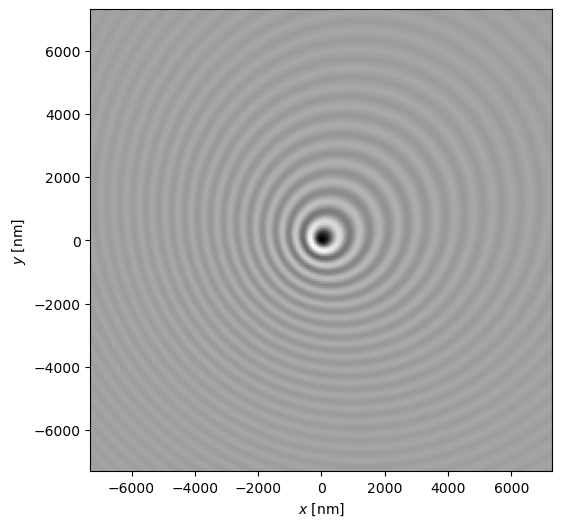

In [4]:
#DEFINE iPSF
def iPSF_misalignment(xv, yv, k, x0, y0, zpp, E0, phi0, ma_theta, ma_phi):
    
    rpp = np.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to the focal plane
    cos_theta = zpp / rpp #cos of scattering angle
    phi_inc = k*zpp #phase shift due to incedent OPD, (note that influence of zf is lumped into phi0)
    phi_sca = k*rpp #phase shift due to return OPD
    fac = np.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
    Escat = E0*fac #scattering amplitude
    
    ma = k*((xv-x0)*np.cos(ma_phi*np.pi/180)+(yv-y0)*np.sin(ma_phi*np.pi/180))*np.sin(ma_theta*np.pi/180) #misalignment
    
    phi_diff = ma-(phi0+phi_inc+phi_sca) #phase difference
    
    iPSF = 2*Escat*np.cos(phi_diff)
    
    return iPSF

#AN EXAMPLE, theta=15 deg and phi=45 deg.
iPSF = iPSF_misalignment(xv, yv, k, 0, 0, 300, 0.3, np.pi/2, 15, 45)

plt.figure()
plt.imshow(iPSF, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
plt.xlabel('$x$ [nm]')
plt.ylabel('$y$ [nm]')
plt.show()

### Beam Gaussianity

So far, we have assumed a reference beam with a flat intensity profile. In reality, the set-up uses a Gaussian beam, having a Gaussian amplitude profile and hence also a Gaussian intensity profile.

This results in a subtle correction for the iPSF, which is significant if the iPSF is comparable in size to the width of the beam.

We model the beam as

$$ E_\textrm{ref}(x,y) = E_{\textrm{ref},0} \exp\left(-\frac{(x-x_{\textrm{ref,0}})^2+(y-y_{\textrm{ref,0}})^2}{\sigma_\textrm{ref}^2}\right), \tag{8}$$

where $E_{\textrm{ref},0}$ is the central amplitude of the beam, $(x_{\textrm{ref,0}},y_{\textrm{ref,0}})$ is the centerpoint of the beam and $\sigma_\textrm{ref}$ denotes the typical width of the beam. Furthermore, we find that there is a non-zero baseline intensity $E_\textrm{base}^2$, which we assume is from environmental light sources or reflections in the set-up, such that the intensity on the detector (without scatterer) is modelled as $ E_\textrm{ref}^2 + E_\textrm{base}^2 $. However, since we assume that this baseline intensity is incoherent with the Gaussian beam, we do not include it in the scattering term. Hence, the expression for the iPSF becomes

$$ \textrm{iPSF} = \frac{2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}}{E_\textrm{ref}^2 + E_\textrm{base}^2}. \tag{9} $$

As discussed earlier, $E_\textrm{sca}$ is proportional to the incident amplitude $E_\textrm{inc}$. We thus assume that $E_\textrm{sca}\sim E_\textrm{ref}(x_0,y_0)$, i.e. we assume that the incident amplitude on the scatterer is proportional to the intensity of the Gaussian beam at the position of the particle. However, since we only measure the beam at the focal plane (or physically, at the detector), the beam may have shifted when it reaches the particle due to the misalignment. Hence, for large misalignment angles, this approximation may not be valid. Nonetheless, for our experimental set-up, we empirically found this to be a good approximation.

In summary, by accounting for the beam, we correct the iPSF as

$$ \textrm{iPSF}_\textrm{corrected} = \frac{E_\textrm{ref}(x,y) E_\textrm{ref}(x_0,y_0)}{E_\textrm{ref}^2(x,y)+E_\textrm{base}^2} \textrm{iPSF}_\textrm{uncorrected}, \tag{10}$$

where we used $\textrm{iPSF}_\textrm{uncorrected}$ to refer to the iPSF for the reference beam with constant intensity as in equation 6.

Below, we implement this correction in the model.

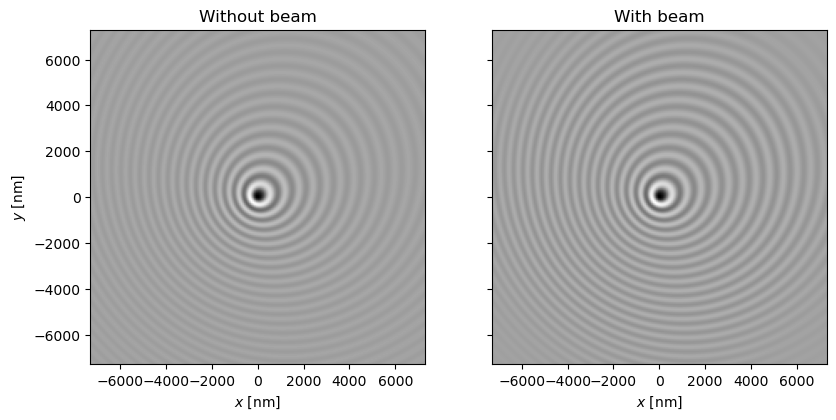

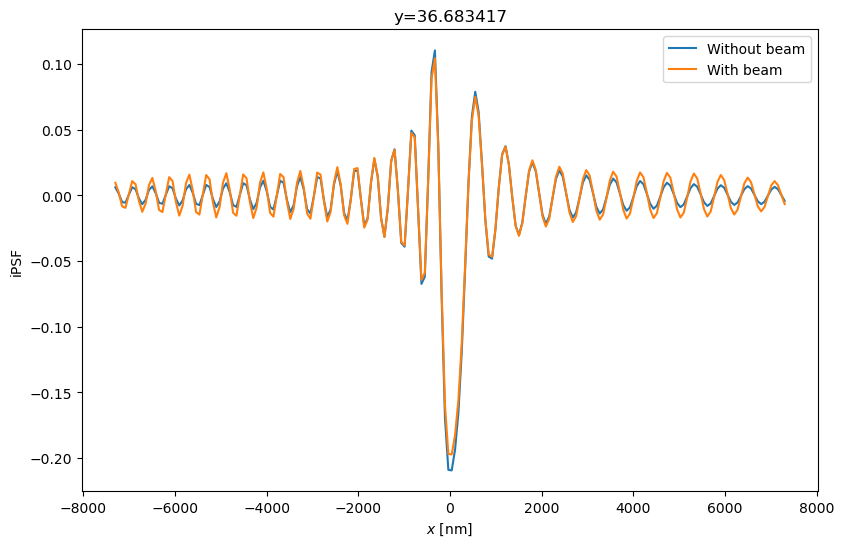

In [5]:
def iPSF_with_beam(xv, yv, k, x0, y0, zpp, E0, phi0, ma_theta, ma_phi, Eref0, Eref_mu_x, Eref_mu_y, Eref_sig, E2_base):

    Eref = Eref0*np.exp(-((xv-Eref_mu_x)**2+(yv-Eref_mu_y)**2)/Eref_sig**2)
    
    Eref_sc = Eref0*np.exp(-(((x0-Eref_mu_x)**2+(y0-Eref_mu_y)**2)/Eref_sig**2))

    iPSF = Eref*Eref_sc/(Eref**2+E2_base) * iPSF_misalignment(xv,yv,k,x0,y0,zpp,E0,phi0,ma_theta,ma_phi)
    
    return iPSF

iPSF_uncorrected = iPSF_misalignment(xv,yv,k,0,0,300,0.3,np.pi/2,15,45)
iPSF_corrected   = iPSF_with_beam(   xv,yv,k,0,0,300,0.3,np.pi/2,15,45,180,0,0,5000,2000)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(iPSF_uncorrected, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].set_title('Without beam')
axs[1].imshow(iPSF_corrected, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].set_title('With beam')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()

plt.figure()
plt.plot(xv[100,:], iPSF_uncorrected[100,:], label='Without beam')
plt.plot(xv[100,:], iPSF_corrected[100,:], label='With beam')
plt.legend()
plt.title('y=%f' % (yv[100,0]))
plt.xlabel('$x$ [nm]')
plt.ylabel('iPSF')
plt.show()

## Image processing

Intensive processing of the raw image is needed to get rid of the background and any deficiencies therein as well as to increase the signal-to-noise ratio in order to improve the fitting performance. We adhere to the procedure that is laid out in Goldfain *et al.*, 2016.

We explain and illustrate this procedure using an example of a measurment of a 120nm polysterene particle stuck to the coverslip.

In [6]:
#LOAD DATA
#raw data
frames_path = Path.cwd() / Path('data/apaine2.11.image0000.h5')
with h5py.File(str(frames_path), "r") as f:
    frames = np.array(f['images']).T.astype('float64')
#dark
dark_frames_path = Path.cwd() / Path('data/apaine2.17.image0000.h5')
with h5py.File(str(dark_frames_path), "r") as f:
    dark_frames = np.array(f['images']).T.astype('float64')
dark = np.median(dark_frames,axis=0)

i = 1770

raw = frames[i,:,:]

The intensity profile produced by the raw image is

$$ \textrm{raw} = E_\textrm{ref}^2 + E_\textrm{sca}^2 + 2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif} + E_\textrm{base}^2+ \textrm{dark}. $$

The first step is to subtract from the raw image a separate dark image, taken from the same set-up but with the laser turned off. For the dark image, we use the median of a limited sequence of frames (see above).

That yields

$$ \textrm{img} = E_\textrm{ref}^2 + E_\textrm{sca}^2 + 2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif} + E_\textrm{base}^2. $$

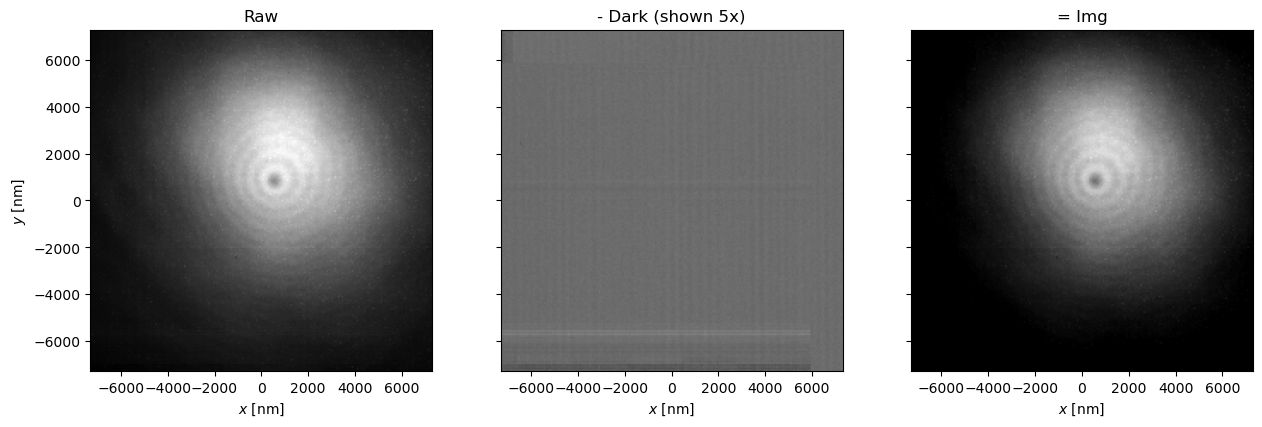

In [7]:
img = raw - dark

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(raw, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].set_title('Raw')
axs[1].imshow(5*dark, vmin=np.min(raw), vmax=np.max(raw), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].set_title('- Dark (shown 5x)')
axs[2].imshow(img, cmap='gray', vmin=np.min(raw), vmax=np.max(raw), extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[2].set_title('= Img')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()

To subtract the background, we subtract a Gaussian blur of the same image with a standard deviation of 6 pixels (in the case of 635 nm light source and 1.5 pixels for 450 nm light). By subtracting this blur, it essentially acts as a high-pass filter for our image, leaving in only the components of the image that vary at a typical size of 6 pixels or less, i.e. the interference pattern.

This takes out both the contributions from the beam $E_\textrm{ref}^2$ and environmental contributions $E_\textrm{base}^2$ as well as any contributions from $E_\textrm{sca}^2$, yielding

$$ \textrm{subt} = 2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}. $$

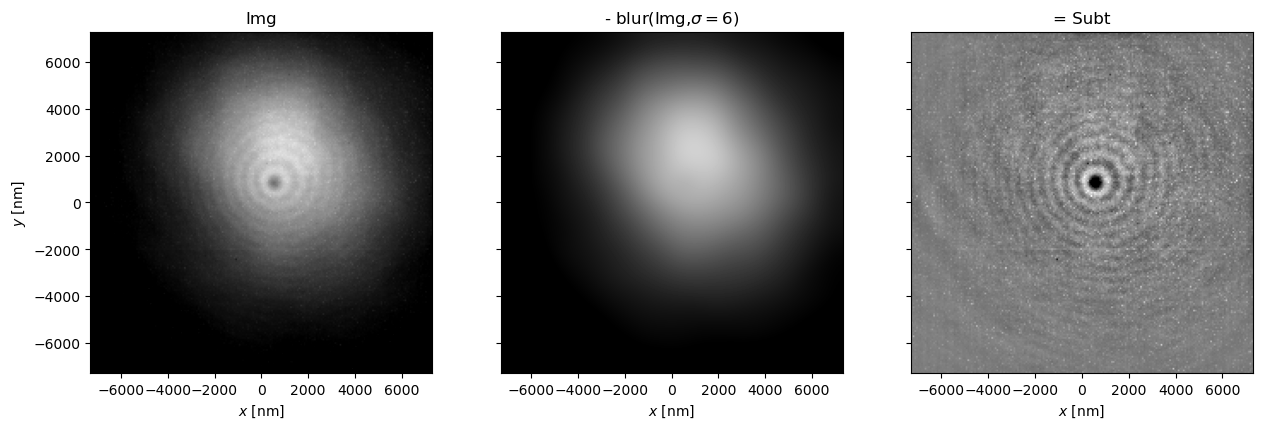

In [8]:
from scipy.ndimage import gaussian_filter

gb1 = gaussian_filter(img, sigma=6)
subt = img - gb1

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img, vmin=np.min(raw), vmax=np.max(raw), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].set_title('Img')
axs[1].imshow(gb1, vmin=np.min(raw), vmax=np.max(raw), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].set_title('- blur(Img,$\\sigma=6$)')
axs[2].imshow(subt, vmin=-0.5*np.max(np.abs(subt)), vmax=0.5*np.max(np.abs(subt)), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[2].set_title('= Subt')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()

The next step is to divide by the background in order to normalize the image to obtain the iPSF. This is done using a slightly larger standard deviation of 15 pixels for the gaussian blur.

This finally gives

$$ \textrm{iPSF} = \frac{2 E_\textrm{ref} E_\textrm{sca} \cos\phi_\textrm{dif}}{E_\textrm{ref}^2 + E_\textrm{base}^2}. $$

Note that in the denominator, we neglect the contribution from $E_\textrm{sca}^2$.

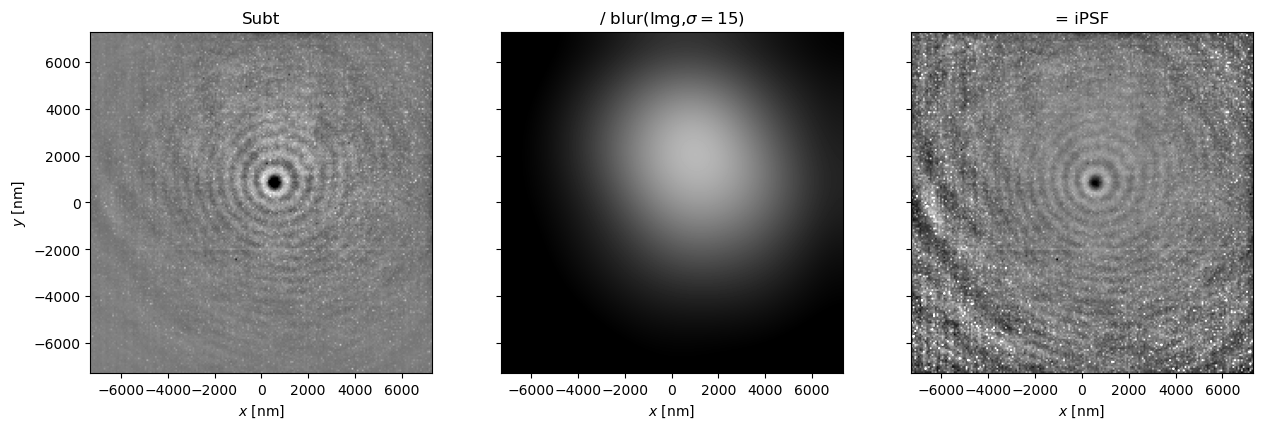

In [9]:
gb2 = gaussian_filter(img, sigma=15)
iPSF = subt / gb2

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(subt, vmin=-0.5*np.max(np.abs(subt)), vmax=0.5*np.max(np.abs(subt)), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].set_title('Subt')
axs[1].imshow(gb2, vmin=np.min(raw), vmax=np.max(raw), cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].set_title('/ blur(Img,$\\sigma=15$)')
axs[2].imshow(iPSF, vmin=-0.3, vmax=0.3, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[2].set_title('= iPSF')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()

As a final step, we can reduce the noise in the iPSF by subtracting the median of a sequence of processed images. This eliminates any noise pattern coming from the camera that is consistent throughout the whole sequence of frames.

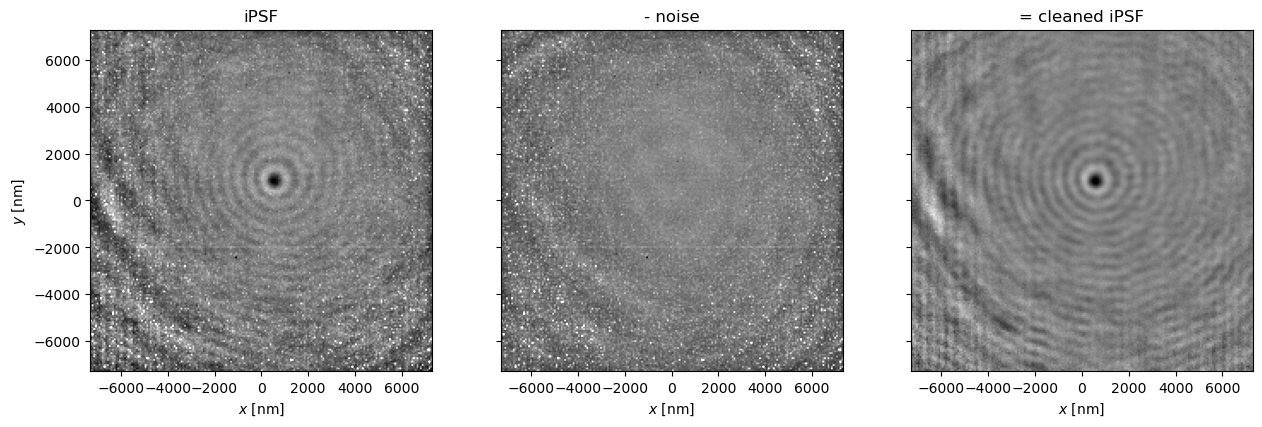

In [10]:
def process_single_image(raw, dark, sig1=6, sig2=15):
    
    #subtract the dark count
    img = raw - dark;
        
    #subtract the reference beem
    subtracted = img - gaussian_filter(img, sigma=sig1)
    
    #divide the reference beam
    divided = subtracted / gaussian_filter(img, sigma=sig2)
    
    #return subtracted
    return divided

sequence = np.array([process_single_image(frames[j,:,:],dark) for j in range(frames.shape[0])])

noise = np.median(sequence,axis=0)

iPSF_clean = iPSF - noise

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(iPSF, vmin=-0.3, vmax=0.3, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].set_title('iPSF')
axs[1].imshow(noise, vmin=-0.3, vmax=0.3, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].set_title('- noise')
axs[2].imshow(iPSF_clean, vmin=-0.3, vmax=0.3, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[2].set_title('= cleaned iPSF')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()
    
iPSF = iPSF_clean

Since it requires the full sequence to be processed in order to calculate the median, it is most efficient to process the full image sequence in one go, rather than each frame individually.

In [11]:
def process_all_images(raws, dark, subt_median=True, sig1=6, sig2=15):
    
    stack = np.array([process_single_image(raws[i,:,:], dark, sig1=sig1, sig2=sig2) for i in range(raws.shape[0])])
    
    if subt_median:
        noise = np.median(stack,axis=0)
        stack = stack - noise[np.newaxis,:,:]
    
    return stack

## Bayesian inference using PyMC

To fit our model to the (processed) data, we use Bayesian inference. Specifically, we use MCMC techniques to infer the free parameters using the Python package PyMC. This leverages the tensor-based library Theano, providing significantly improved computational performance over the purely numerical libraries for the calculation of gradients.

In order to account for the Gaussianity of the beam, we fit the model in two steps. First, the Gaussian beam is fitted to the raw data (with the dark count subtracted). Then, using the obtained parameters that define the Gaussian beam, we fit the final iPSF to the processed image. This process is depicted below.

<img src="image/fitting_scheme.png" width=800 />
<center>Flowchart for the two-step fitting of the iPSF, accounting for the Gaussian beam.<br>The red rectangle denotes the cropped area that is used for fitting.</center>

Note that in the case where only a few fringes are present in the image, such that the effective size of the iPSF is much smaller than the size of the Gaussian beam, one can neglect the effect of the beam. In that case, one can reduce the computational effort by disregarding the upper branch of this fitting scheme and just fitting the iPSF model without beam to the processed image directly.

We crop the image around the center of the iPSF to improve the fitting performance. Not only does this speed-up the fitting process, it also avoids fitting to the parts of the image where the signal to noise ratio is very low, which would make up a disproportionally large fraction of the pixels due to the inherent axial symmetry of the iPSF. (NB: fitting to heavy noise would bias the scattering amplitude to lower values as well as increase the risk of overfitting.)

To define the likelihood, we use the simplest model for the noise of a Gaussian with fixed $\sigma$ and no correlations between pixels. We include $\sigma$ as a fit parameter in order to obtain an accurate representation of the uncertainty in the system.

First, we implement the model for fitting the Gaussian beam. We use Gamma distributions for the priors of the variables that support only positive values and Normal distributions otherwise.

In [12]:
def infer_beam(data_beam, xv, yv, sig_noise_beam, downsample=1, samples=500, cores=1, init='jitter+adapt_diag_grad'):
    
    #DOWNSAMPLE
    data_beam = data_beam[::downsample, ::downsample]
    xv = xv[::downsample, ::downsample] ; yv = yv[::downsample, ::downsample]
    
    beam_model = pm.Model()
    with beam_model:

        # Priors
        Eref0 = pm.Gamma("Eref0", mu=150, sigma=50)
        Eref_mu_x = pm.Normal("Eref_mu_x", mu=0, sigma=2000)
        Eref_mu_y = pm.Normal("Eref_mu_y", mu=0, sigma=2000)
        Eref_sig = pm.Gamma("Eref_sig", mu=6000, sigma=2000)

        E2_base = pm.Normal("E2_base", mu=4000, sigma=2000);
        
        Eref = Eref0*pm.math.exp(-((xv-Eref_mu_x)**2+(yv-Eref_mu_y)**2)/Eref_sig**2)
        
        beam = Eref**2 + E2_base

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal("Y_obs", mu=beam, sigma=sig_noise_beam, observed=data_beam)
        
    with beam_model:
        # draw 500 posterior samples, feel free to increase the number of employed cores
        idata = pm.sample(samples, cores=cores, init=init, return_inferencedata=True)
        
    with beam_model:
        summary=az.summary(idata)
        display(summary)
    
    return beam_model, idata, summary

Next, we implement the model for the iPSF, taking the parameters of the beam as input as well as the other model parameters. We allow most model parameters to be set both as a fixed or variable parameter, the latter case requiring a mean and standard deviation for the prior.

To fit the phase `phi0`, we use a trick to account for the the fact that it should be considered modulo $2\pi$, because PyMC does not natively support this (nor does it support complex numbers). To that extent, we separately fit the sign `sphi0` and the absolute value `aphi0`, so that the algorithm can easily jump from $+\pi$ to $-\pi$ by just flipping `sphi0`, preventing the MCMC chains from getting stuck against the cut-off.

We use the default NUTS sampler implemented in PyMC
as our primary fitting algorithm. For the case of fixed phase `phi0`, however, we use an SMC sampler, because in this case, the posterior becomes multimodal in `zpp` as this parameter is then primarily used to match the phase. The SMC sampler performs better for multimodal posteriors, compared to the NUTS sampler.

The full model is provided below.

In [13]:
def infer_particle_w_beam(iPSF_data, xv, yv, Eref, Eref2, beam_spec, k_0, k_rel_var=None,
                          sig_noise_mu=0.05, sig_noise_sig=0.05, fixed_sig_noise=None,
                          crop=(0,-1,0,-1), zpp_mu=300, zpp_sig=300,
                          E0_mu=0.3, E0_sig=0.2,
                          x0_mu=0, y0_mu=0, xy0_sig=1000,
                          fixed_phi0=None, fixed_ma_theta=None, fixed_ma_phi=None,
                          samples=500, cores=1, init='jitter+adapt_diag_grad'):
    
    Eref0 = beam_spec[0] ; Eref_mu_x = beam_spec[1] ; Eref_mu_y = beam_spec[2] ; Eref_sig = beam_spec[3]
    
    #CROP
    iPSF_data = iPSF_data[crop[0]:crop[1],crop[2]:crop[3]]
    xv = xv[crop[0]:crop[1],crop[2]:crop[3]] ; yv = yv[crop[0]:crop[1],crop[2]:crop[3]]
    Eref = Eref[crop[0]:crop[1],crop[2]:crop[3]] ; Eref2 = Eref2[crop[0]:crop[1],crop[2]:crop[3]]

    #DEFINE MODEL
    iPSF_model = pm.Model()
    with iPSF_model:

        ### Priors
        
        zpp = pm.Gamma("zpp", mu=zpp_mu, sigma=zpp_sig)
        if fixed_phi0==None:
            aphi0 = pm.Uniform("aphi0", lower=0, upper=np.pi)
            sphi0 = pm.Bernoulli("sphi0", p=0.5)
            phi0 = (2*sphi0-1)*aphi0 #sign phi0
            phi0 = pm.Deterministic("phi0", phi0)
        else:
            phi0 = fixed_phi0
        E0 = pm.Gamma("E0", mu=E0_mu, sigma=E0_sig)
        
        if fixed_ma_theta==None:
            ma_theta = pm.TruncatedNormal("ma_theta", mu=5, sigma=3, lower=0.0, upper=15)
        else:
            ma_theta = fixed_ma_theta
        if fixed_ma_phi==None:
            ma_phi = pm.TruncatedNormal("ma_phi", mu=45, sigma=20, lower=0, upper=90)
        else:
            ma_phi = fixed_ma_phi
        
        x0 = pm.Normal('x0', mu=x0_mu, sigma=xy0_sig)
        y0 = pm.Normal('y0', mu=y0_mu, sigma=xy0_sig)
        
        if k_rel_var==None:
            k = k_0
        else:
            kfac = pm.Normal("kfac", mu=1, sigma=k_rel_var)
            k = k_0*kfac
        
        if fixed_sig_noise==None:
            sig_noise = pm.Gamma('sig_noise', mu=sig_noise_mu, sigma=sig_noise_sig)
        else:
            sig_noise = fixed_sig_noise

        ### calculate iPSF
        
        if fixed_ma_theta==None or fixed_ma_phi==None:
            ma = k*((xv-x0)*pm.math.cos(ma_phi*np.pi/180)+(yv-y0)*pm.math.sin(ma_phi*np.pi/180))*pm.math.sin(ma_theta*np.pi/180)
        else:
            ma = k*((xv-x0)*np.cos(ma_phi*np.pi/180)+(yv-y0)*np.sin(ma_phi*np.pi/180))*np.sin(ma_theta*np.pi/180)
        
        Eref_sc = Eref0*pm.math.exp(-(((x0-Eref_mu_x)**2+(y0-Eref_mu_y)**2)/Eref_sig**2))
        
        rpp = pm.math.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to focal plane
        cos_theta = zpp / rpp #cos of scattering angle
        phi_inc = k*zpp #phase shift due to incedent OPD, zf is lumped into phi0
        phi_sca = k*rpp #phase shift due to return OPD
        fac = pm.math.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
        Escat = E0*fac #scattering amplitude

        phi_diff = ma-(phi0+phi_inc+phi_sca)
        iPSF = 2*Eref*Eref_sc*Escat*pm.math.cos(phi_diff) / Eref2;

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal("Y_obs", mu=iPSF, sigma=sig_noise, observed=iPSF_data)
        
    with iPSF_model:
        if fixed_phi0 is None:
            # draw 500 posterior samples, feel free to increase the number of employed cores
            idata = pm.sample(samples, cores=cores, init=init, return_inferencedata=True)
        else:
            # SMC sampling robust to multimodal posterior, feel free to increase the number of chains
            # Parallel computing does not seem to work with this SMC implementation (bug)
            idata = pm.sample_smc(samples, cores=cores, parallel=True)
            #trace = az.from_pymc3(trace_pymc3)
    with iPSF_model:        
        summary = az.summary(idata, round_to=10)
        display(summary)
        
    return iPSF_model, idata, summary

For completeness, we also provide the function for fitting an iPSF with a flat beam profile below.

In [14]:
def infer_particle_no_beam(iPSF_data, xv, yv, k_0, k_rel_var=None,
                          sig_noise_mu=0.05, sig_noise_sig=0.05, fixed_sig_noise=None,
                          crop=(0,-1,0,-1), zpp_mu=300, zpp_sig=300,
                          E0_mu=0.3, E0_sig=0.2,
                          x0_mu=0, y0_mu=0, xy0_sig=1000,
                          fixed_phi0=None, fixed_ma_theta=None, fixed_ma_phi=None,
                          samples=500, cores=1, init='jitter+adapt_diag_grad'):
    
    #CROP
    iPSF_data = iPSF_data[crop[0]:crop[1],crop[2]:crop[3]]
    xv = xv[crop[0]:crop[1],crop[2]:crop[3]] ; yv = yv[crop[0]:crop[1],crop[2]:crop[3]]
    
    #DEFINE MODEL
    iPSF_model = pm.Model()
    with iPSF_model:

        ### Priors
        zpp = pm.Gamma("zpp", mu=zpp_mu, sigma=zpp_sig)
        if fixed_phi0==None:
            aphi0 = pm.Uniform("aphi0", lower=0, upper=np.pi)
            sphi0 = pm.Bernoulli("sphi0", p=0.5)
            phi0 = (2*sphi0-1)*aphi0 #sign phi0
            phi0 = pm.Deterministic("phi0", phi0)
        else:
            phi0 = fixed_phi0
        E0 = pm.Gamma("E0", mu=E0_mu, sigma=E0_sig)
        
        if fixed_ma_theta==None:
            ma_theta = pm.TruncatedNormal("ma_theta", mu=5, sigma=3, lower=0.0, upper=15)
        else:
            ma_theta = fixed_ma_theta
        if fixed_ma_phi==None:
            ma_phi = pm.TruncatedNormal("ma_phi", mu=45, sigma=20, lower=0, upper=90)
        else:
            ma_phi = fixed_ma_phi
        
        x0 = pm.Normal('x0', mu=x0_mu, sigma=xy0_sig)
        y0 = pm.Normal('y0', mu=y0_mu, sigma=xy0_sig)
        
        if k_rel_var==None:
            k = k_0
        else:
            kfac = pm.Normal("kfac", mu=1, sigma=k_rel_var)
            k = k_0*kfac
        
        if fixed_sig_noise==None:
            sig_noise = pm.Gamma('sig_noise', mu=sig_noise_mu, sigma=sig_noise_sig)
        else:
            sig_noise = fixed_sig_noise

        ### calculate iPSF
        
        if fixed_ma_theta==None or fixed_ma_phi==None:
            ma = k*((xv-x0)*pm.math.cos(ma_phi*np.pi/180)+(yv-y0)*pm.math.sin(ma_phi*np.pi/180))*pm.math.sin(ma_theta*np.pi/180)
        else:
            ma = k*((xv-x0)*np.cos(ma_phi*np.pi/180)+(yv-y0)*np.sin(ma_phi*np.pi/180))*np.sin(ma_theta*np.pi/180)
         
        rpp = pm.math.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to focal plane
        cos_theta = zpp / rpp #cos of scattering angle
        phi_inc = k*zpp #phase shift due to incedent OPD, zf is lumped into phi0
        phi_sca = k*rpp #phase shift due to return OPD
        fac = pm.math.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
        Escat = E0*fac #scattering amplitude

        phi_diff = ma-(phi0+phi_inc+phi_sca)
        iPSF = 2*Escat*pm.math.cos(phi_diff) / Eref2;

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal("Y_obs", mu=iPSF, sigma=sig_noise, observed=iPSF_data)
        
    with iPSF_model:
        if fixed_phi0 is None:
            # draw 500 posterior samples, feel free to increase the number of employed cores
            idata = pm.sample(samples, cores=cores, init=init, return_inferencedata=True)
        else:
            # SMC sampling robust to multimodal posterior, feel free to increase the number of chains
            # Parallel computing does not seem to work with this SMC implementation (bug)
            idata = pm.sample_smc(samples, cores=cores, parallel=True)
            #trace = az.from_pymc3(trace_pymc3)
    with iPSF_model:        
        summary = az.summary(idata, round_to=10)
        display(summary)
        
    return iPSF_model, idata, summary

We can now readily employ these functions to fit to an experimentally obtained image. This is laid out for the 120nm PS particle below. (Note that one may need to tune the priors, which we have done for the example here.)

First, we define the necessary constants and we load and process the data.

In [15]:
#DEFINE CONSTANTS
k = 2*np.pi/(635/1.5)/1.222 #empirically established

fov = 14600

sig_noise = 0.05
sig_noise_beam = 2000

#DEFINE MESH
def getMesh(xmin,xmax,ymin,ymax,nx=200,ny=200):
    x = np.linspace(xmin, xmax, nx)
    y = np.linspace(ymin, ymax, ny)
    return np.meshgrid(x, y)

xv,yv = getMesh(-0.5,0.5,-0.5,0.5)
xv = xv*fov ; yv = yv*fov

#LOAD and PROCESS DATA
#raw data
with h5py.File('data/apaine2.11.image0000.h5', "r") as f:
    frames = np.array(f['images']).T.astype('float64')
#dark
with h5py.File('data/apaine2.17.image0000.h5', "r") as f:
    dark_frames = np.array(f['images']).T.astype('float64')
dark = np.median(dark_frames,axis=0)

#process
iPSF_datas = process_all_images(frames,dark)
print('image processed')

i = 1770

iPSF_data = iPSF_datas[i,:,:]
data_beam = frames[i,:,:] - dark

image processed


Next, we fit the Gaussian beam and retrieve means of the parameter values.

Running on PyMC v5.5.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag_grad...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Eref0, Eref_mu_x, Eref_mu_y, Eref_sig, E2_base]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 95 seconds.


mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Eref_mu_x  1070.079   6.636  1057.433  1081.749      0.126    0.089    2950.0   
Eref_mu_y  1696.498   7.262  1681.706  1708.853      0.150    0.106    2347.0   
E2_base    2057.143  46.696  1966.601  2142.561      1.407    0.996    1100.0   
Eref0       184.190   0.210   183.771   184.567      0.005    0.003    2172.0   
Eref_sig   6189.078  17.509  6156.455  6222.329      0.547    0.387    1020.0   

           ess_tail  r_hat  
Eref_mu_x    1391.0    1.0  
Eref_mu_y    1409.0    1.0  
E2_base      1196.0    1.0  
Eref0        1555.0    1.0  
Eref_sig     1144.0    1.0

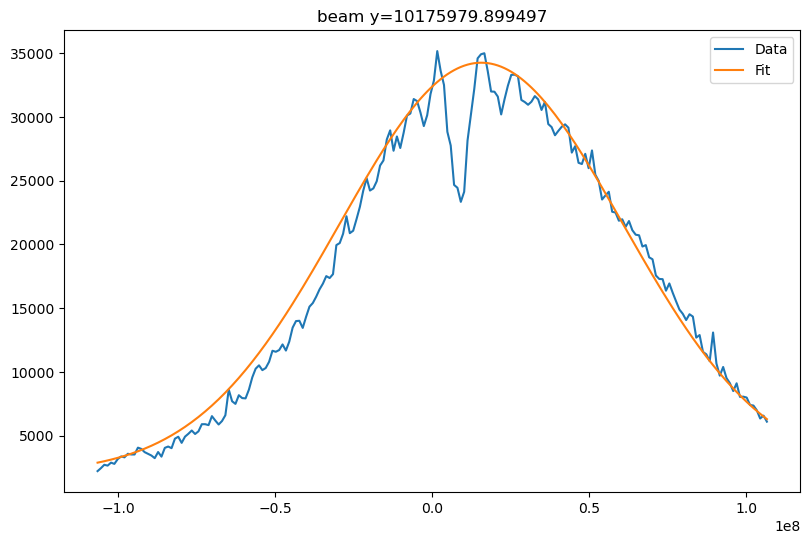

In [16]:
print(f"Running on PyMC v{pm.__version__}")

#FIT BEAM
beam_model, idata_beam, summary_beam = infer_beam(data_beam, xv, yv, sig_noise_beam, downsample=2, cores=CORES)

Eref0=summary_beam['mean']['Eref0']
Eref_mu_x=summary_beam['mean']['Eref_mu_x']
Eref_mu_y=summary_beam['mean']['Eref_mu_y']
Eref_sig=summary_beam['mean']['Eref_sig']
E2_base=summary_beam['mean']['E2_base']

Eref = Eref0*np.exp(-((xv-Eref_mu_x)**2+(yv-Eref_mu_y)**2)/Eref_sig**2)
Eref2 = Eref**2 + E2_base
beam_spec = (Eref0,Eref_mu_x,Eref_mu_y,Eref_sig)

#plot beam
beam_fit = Eref**2 + E2_base

plt.figure()
plt.plot(xv[109,:]*fov,data_beam[109,:],label='Data')
plt.plot(xv[109,:]*fov,beam_fit[109,:],label='Fit')
plt.legend()
plt.title('beam y=%f' % (yv[109,0]*fov))
plt.show()

Finally, we fit the full iPSF using the inferred specs of the beam and we plot the results. Note that we help the fitter by giving a somewhat informative prior on the horizontal position, which is necessary to get stable fitting performance. In practice, such an estimate may for example come from a Hough transform calculation.

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [zpp, aphi0, E0, ma_theta, ma_phi, x0, y0, sig_noise]
>BinaryGibbsMetropolis: [sphi0]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 395 seconds.
C:\Users\vnm\mambaforge\envs\iscat-model\Lib\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\vnm\mambaforge\envs\iscat-model\Lib\site-packages\arviz\stats\diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


mean        sd      hdi_3%     hdi_97%  mcse_mean   mcse_sd  \
sphi0        0.000000  0.000000    0.000000    0.000000   0.000000  0.000000   
x0         571.308457  2.263413  566.734083  575.317935   0.067369  0.047660   
y0         812.746632  2.311705  808.533981  817.207498   0.058301  0.041246   
zpp        407.350341  2.621028  402.342083  412.120574   0.073348  0.051877   
aphi0        0.691984  0.048003    0.594117    0.773967   0.001336  0.000945   
E0           0.302953  0.002680    0.297793    0.307652   0.000056  0.000040   
ma_theta     6.064075  0.063088    5.942321    6.181834   0.001821  0.001288   
ma_phi      51.293857  0.568782   50.211849   52.406292   0.015236  0.010776   
sig_noise    0.018825  0.000135    0.018570    0.019070   0.000003  0.000002   
phi0        -0.691984  0.048003   -0.773967   -0.594117   0.001336  0.000945   

              ess_bulk     ess_tail     r_hat  
sphi0      2000.000000  2000.000000       NaN  
x0         1126.754927   964.630585  1.004333  
y0         1587.318889  1427.560468  1.001498  
zpp        1289.657182  1029.566122  1.002495  
aphi0      1306.485340  1318.260651  1.001763  
E0         2320.465980  1582.036790  1.002438  
ma_theta   1191.695076  1215.988053  1.002826  
ma_phi     1399.869563  1302.011403  1.002168  
sig_noise  1976.375361  1333.174484  1.000625  
phi0       1306.485340  1318.260651  1.001763

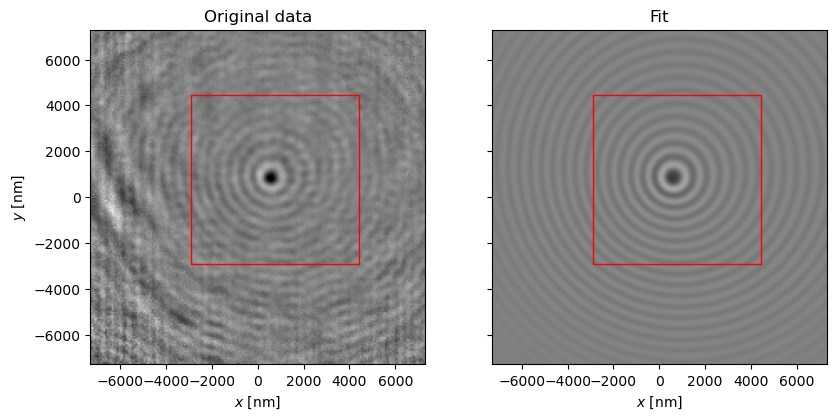

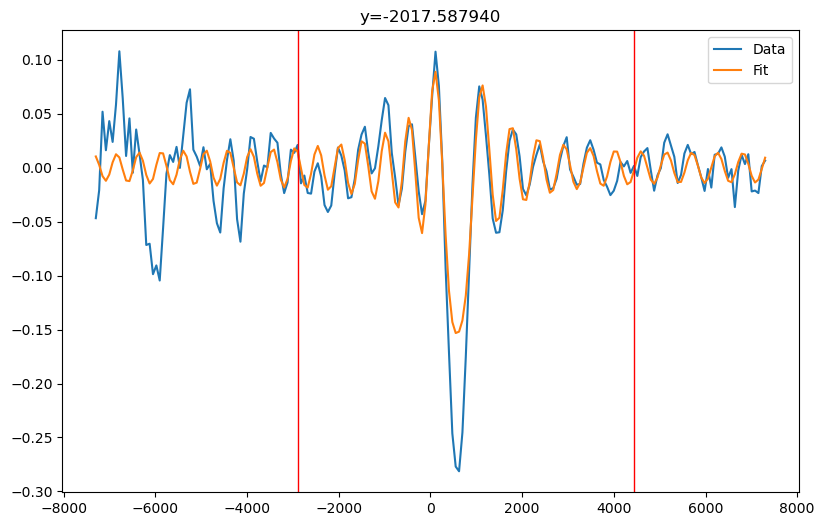

In [17]:
#FIT iPSF
crop=(60,160,60,160) #format: (y_begin, y_end, x_begin, x_end)
iPSF_model, idata, summary = infer_particle_w_beam(iPSF_data, xv, yv, Eref, Eref2, 
                                                   beam_spec, k, 
                                                   sig_noise_mu=sig_noise, sig_noise_sig=sig_noise, 
                                                   crop=crop, zpp_mu=800, x0_mu=570, y0_mu=810, xy0_sig=120,
                                                   cores=CORES)
    
#CALCULATE FITTED iPSF
zpp = summary['mean']['zpp']
phi0 = summary['mean']['phi0']
E0 = summary['mean']['E0']
ma_theta = summary['mean']['ma_theta']
ma_phi = summary['mean']['ma_phi']
x0 = summary['mean']['x0']
y0 = summary['mean']['y0']

iPSF_fit = iPSF_with_beam(xv, yv, k, x0, y0, zpp, E0, phi0, ma_theta, ma_phi, Eref0, Eref_mu_x, Eref_mu_y, Eref_sig, E2_base)

#PLOT
from matplotlib.patches import Rectangle
maxValP=0.3

fig, axs = plt.subplots(1, 2)
axs[0].imshow(iPSF_data, vmin=-maxValP, vmax=maxValP, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[0].add_patch(Rectangle((xv[0,crop[2]],yv[crop[0],0]), xv[0,crop[3]]-xv[0,crop[2]], yv[crop[1],0]-yv[crop[0],0], linewidth=1, edgecolor='r', facecolor='none'))
axs[0].set_title('Original data')
axs[1].imshow(iPSF_fit, vmin=-maxValP, vmax=maxValP, cmap='gray', extent=[np.amin(xv),np.amax(xv),np.amin(yv),np.amax(yv)], origin='lower')
axs[1].add_patch(Rectangle((xv[0,crop[2]], yv[crop[0],0]), xv[0,crop[3]]-xv[0,crop[2]], yv[crop[1],0]-yv[crop[0],0], linewidth=1, edgecolor='r', facecolor='none'))
axs[1].set_title('Fit')
for ax in axs.flat:
    ax.set(xlabel='$x$ [nm]', ylabel='$y$ [nm]')
    ax.label_outer()
plt.show()

plt.figure()
plt.plot(xv[109,:], iPSF_data[109,:], label='Data')
plt.plot(xv[109,:], iPSF_fit[109,:], label='Fit')
plt.axvline(x = xv[0,crop[2]], linewidth=1, color='r')
plt.axvline(x = xv[0,crop[3]], linewidth=1, color='r')
plt.legend()
plt.title('y=%f' % (yv[72,0]))
plt.show()


Note that although the agreement between the data and the model is mostly satisfactory, a quantitative discrepancy is evident in the central fringe. This could possibly be explained by Mie scattering effects which can be significant for particles of this size.

We can also take a look at the posterior distribution of our parameters

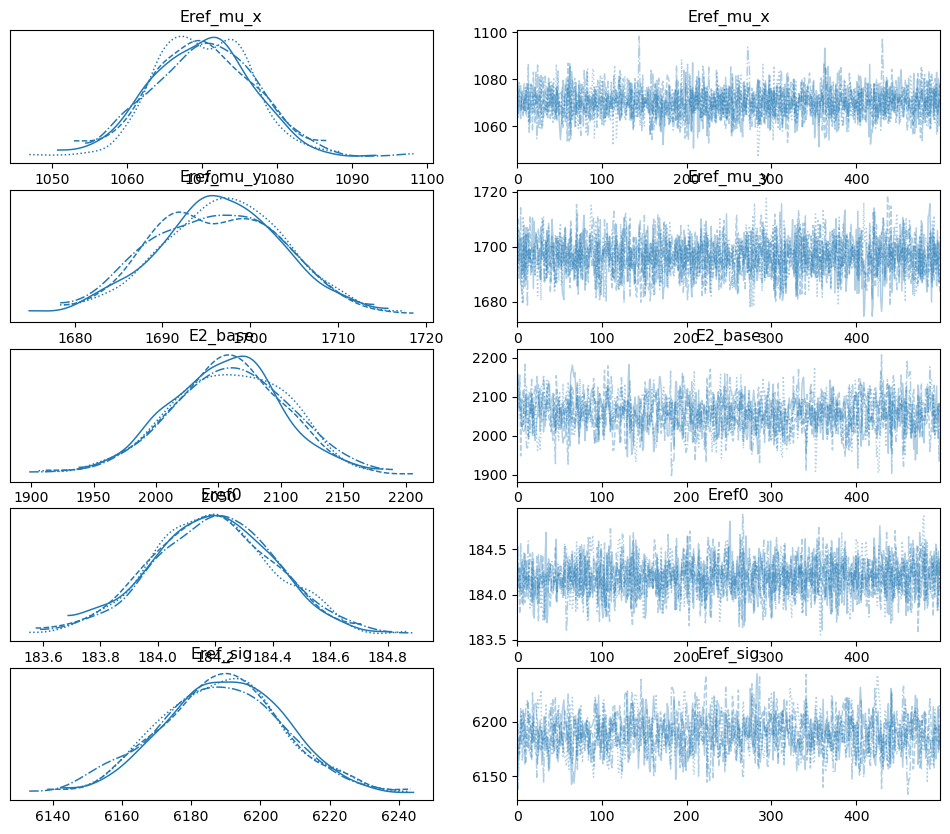

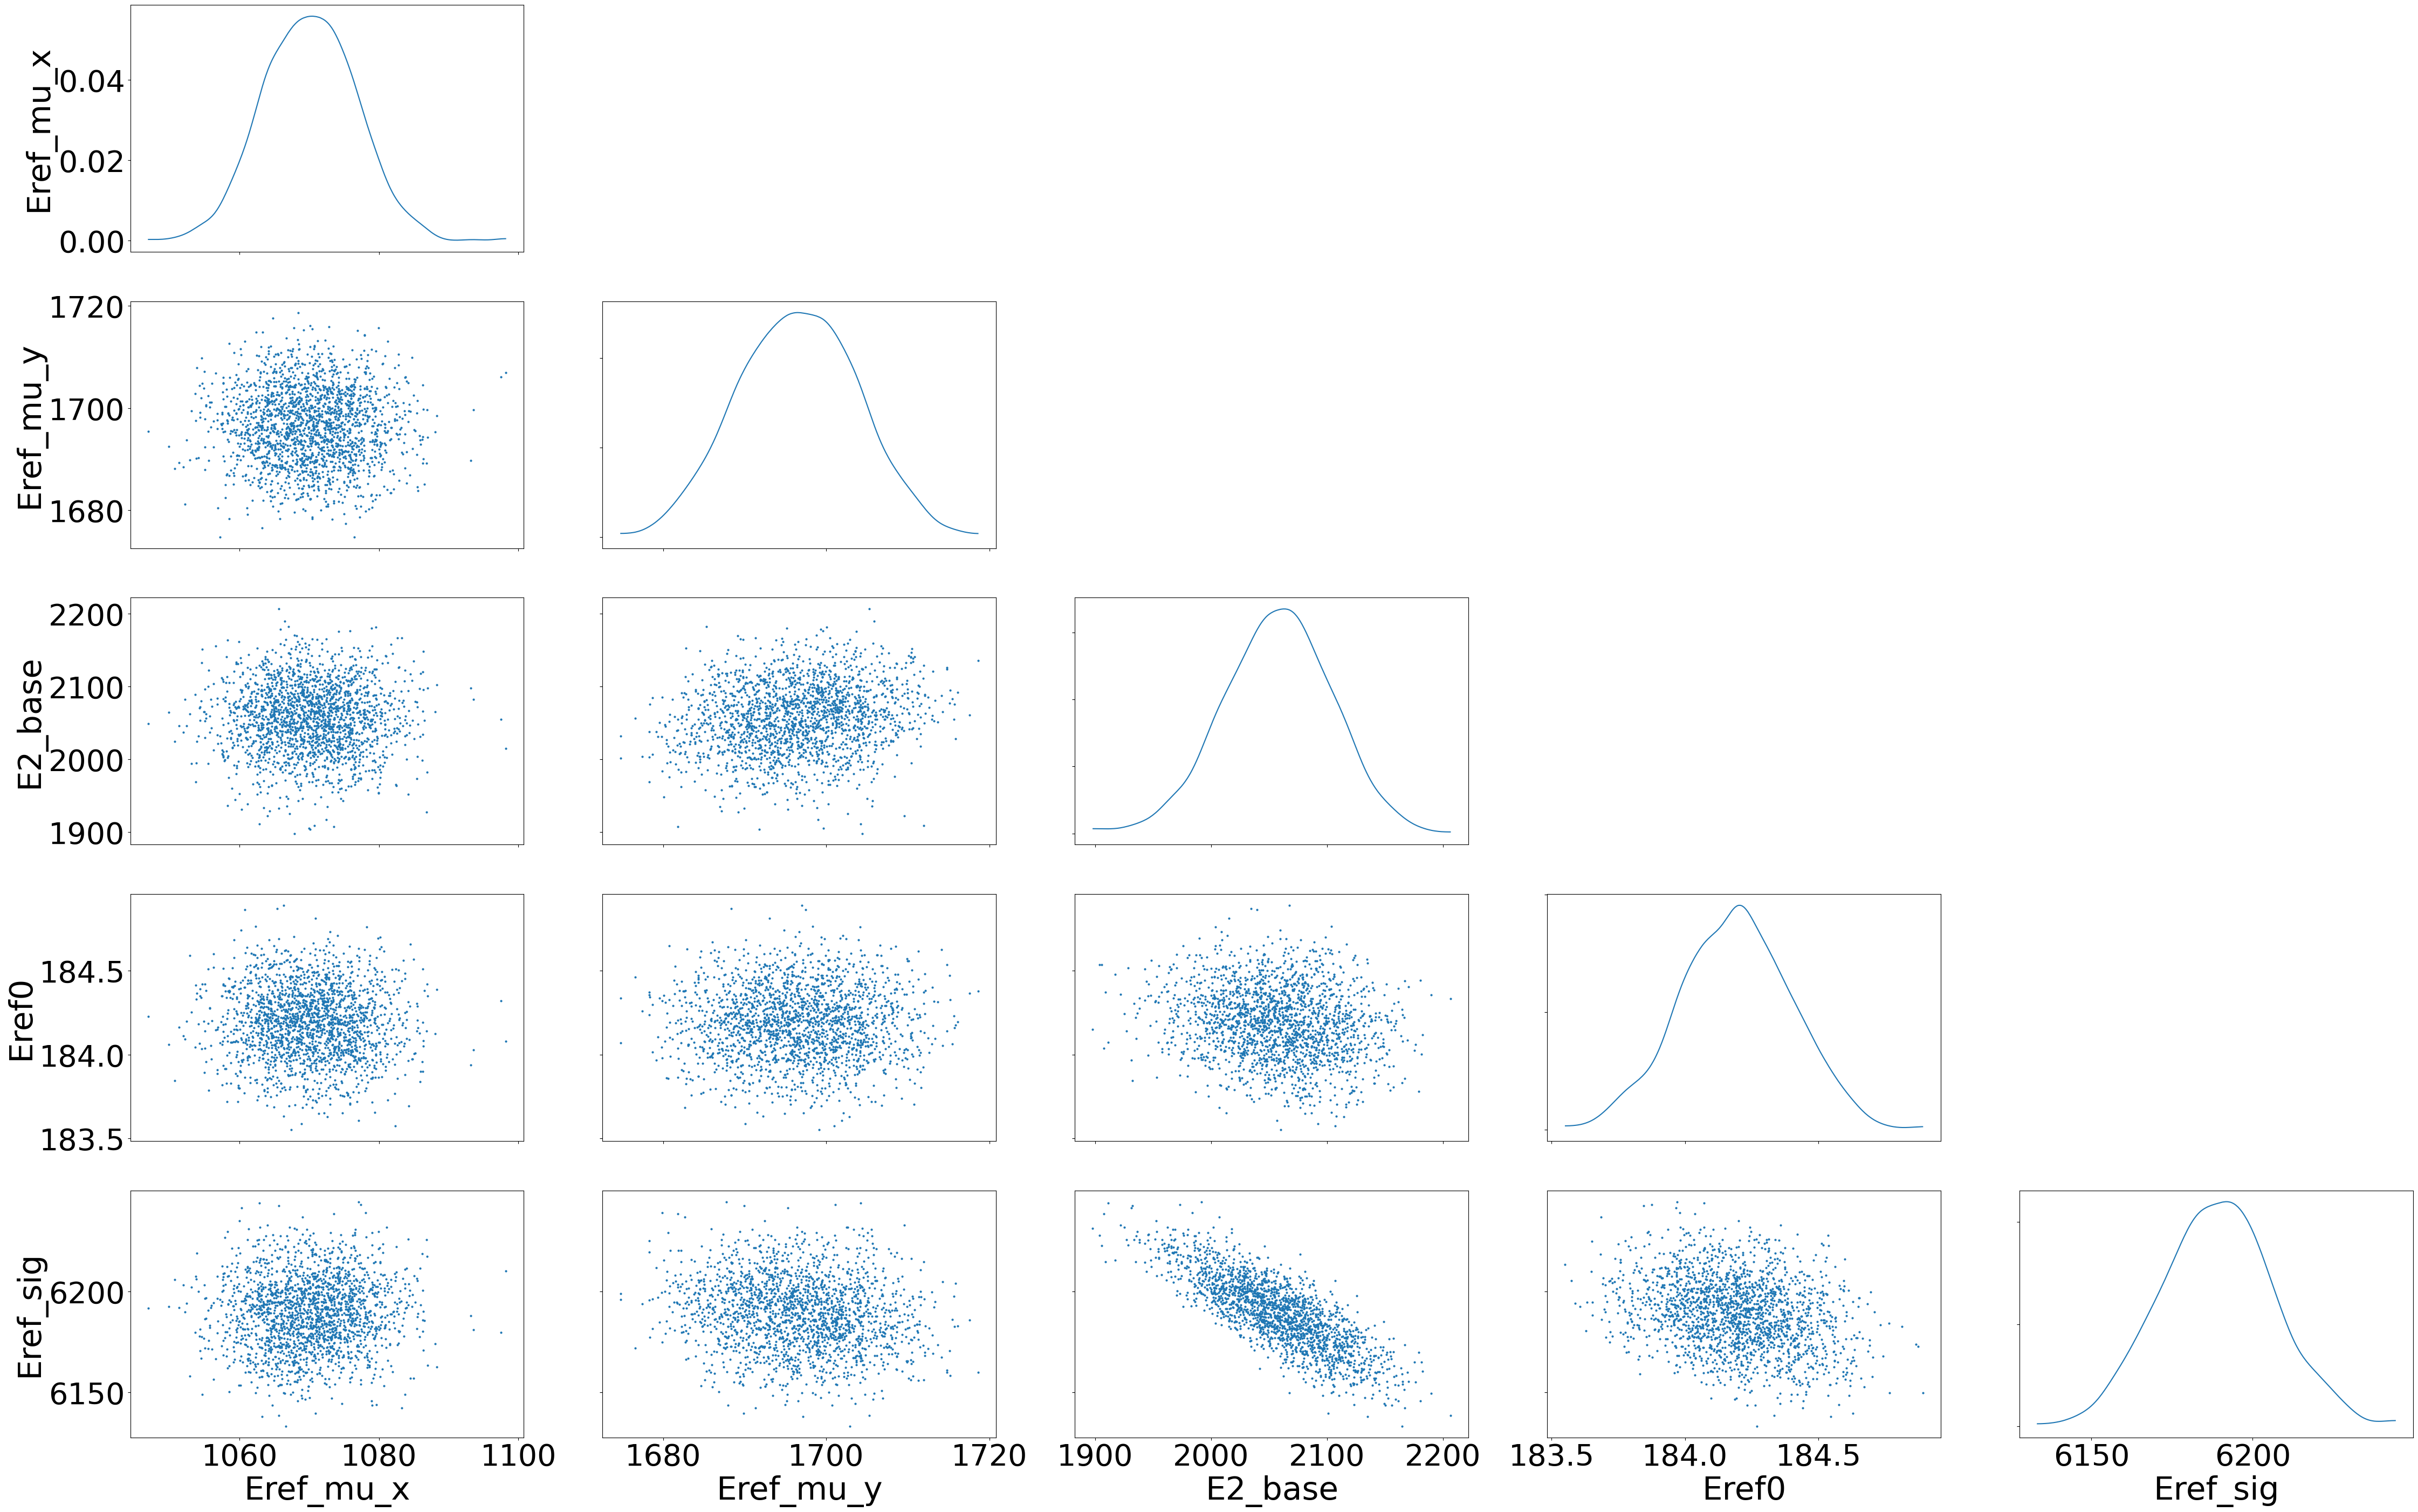

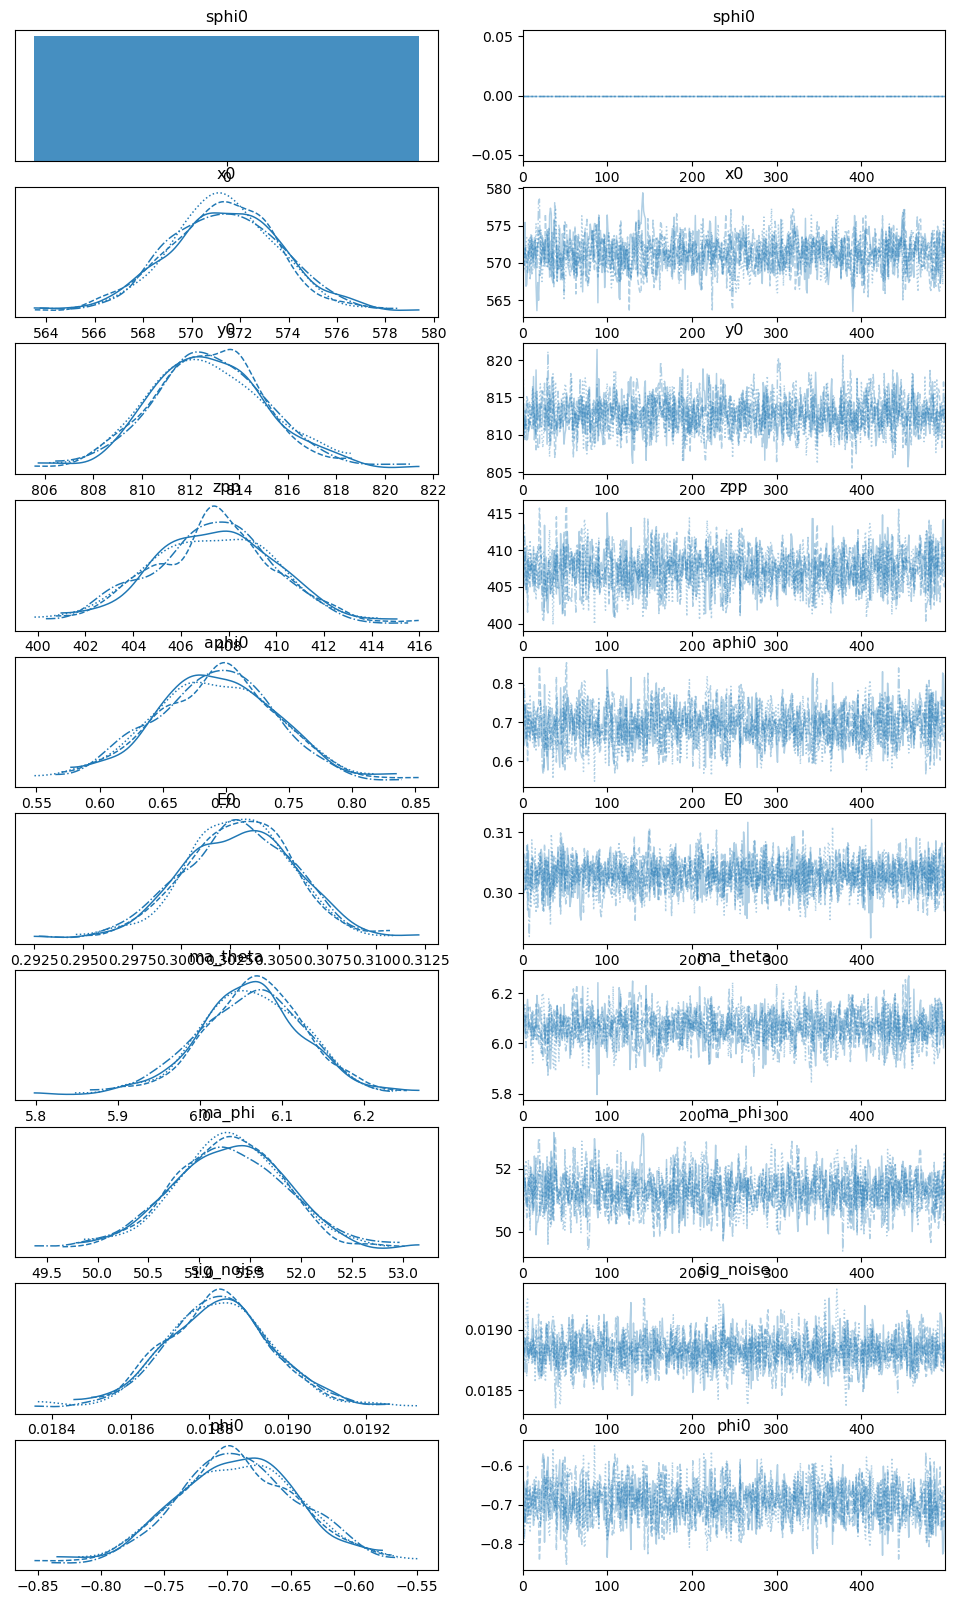

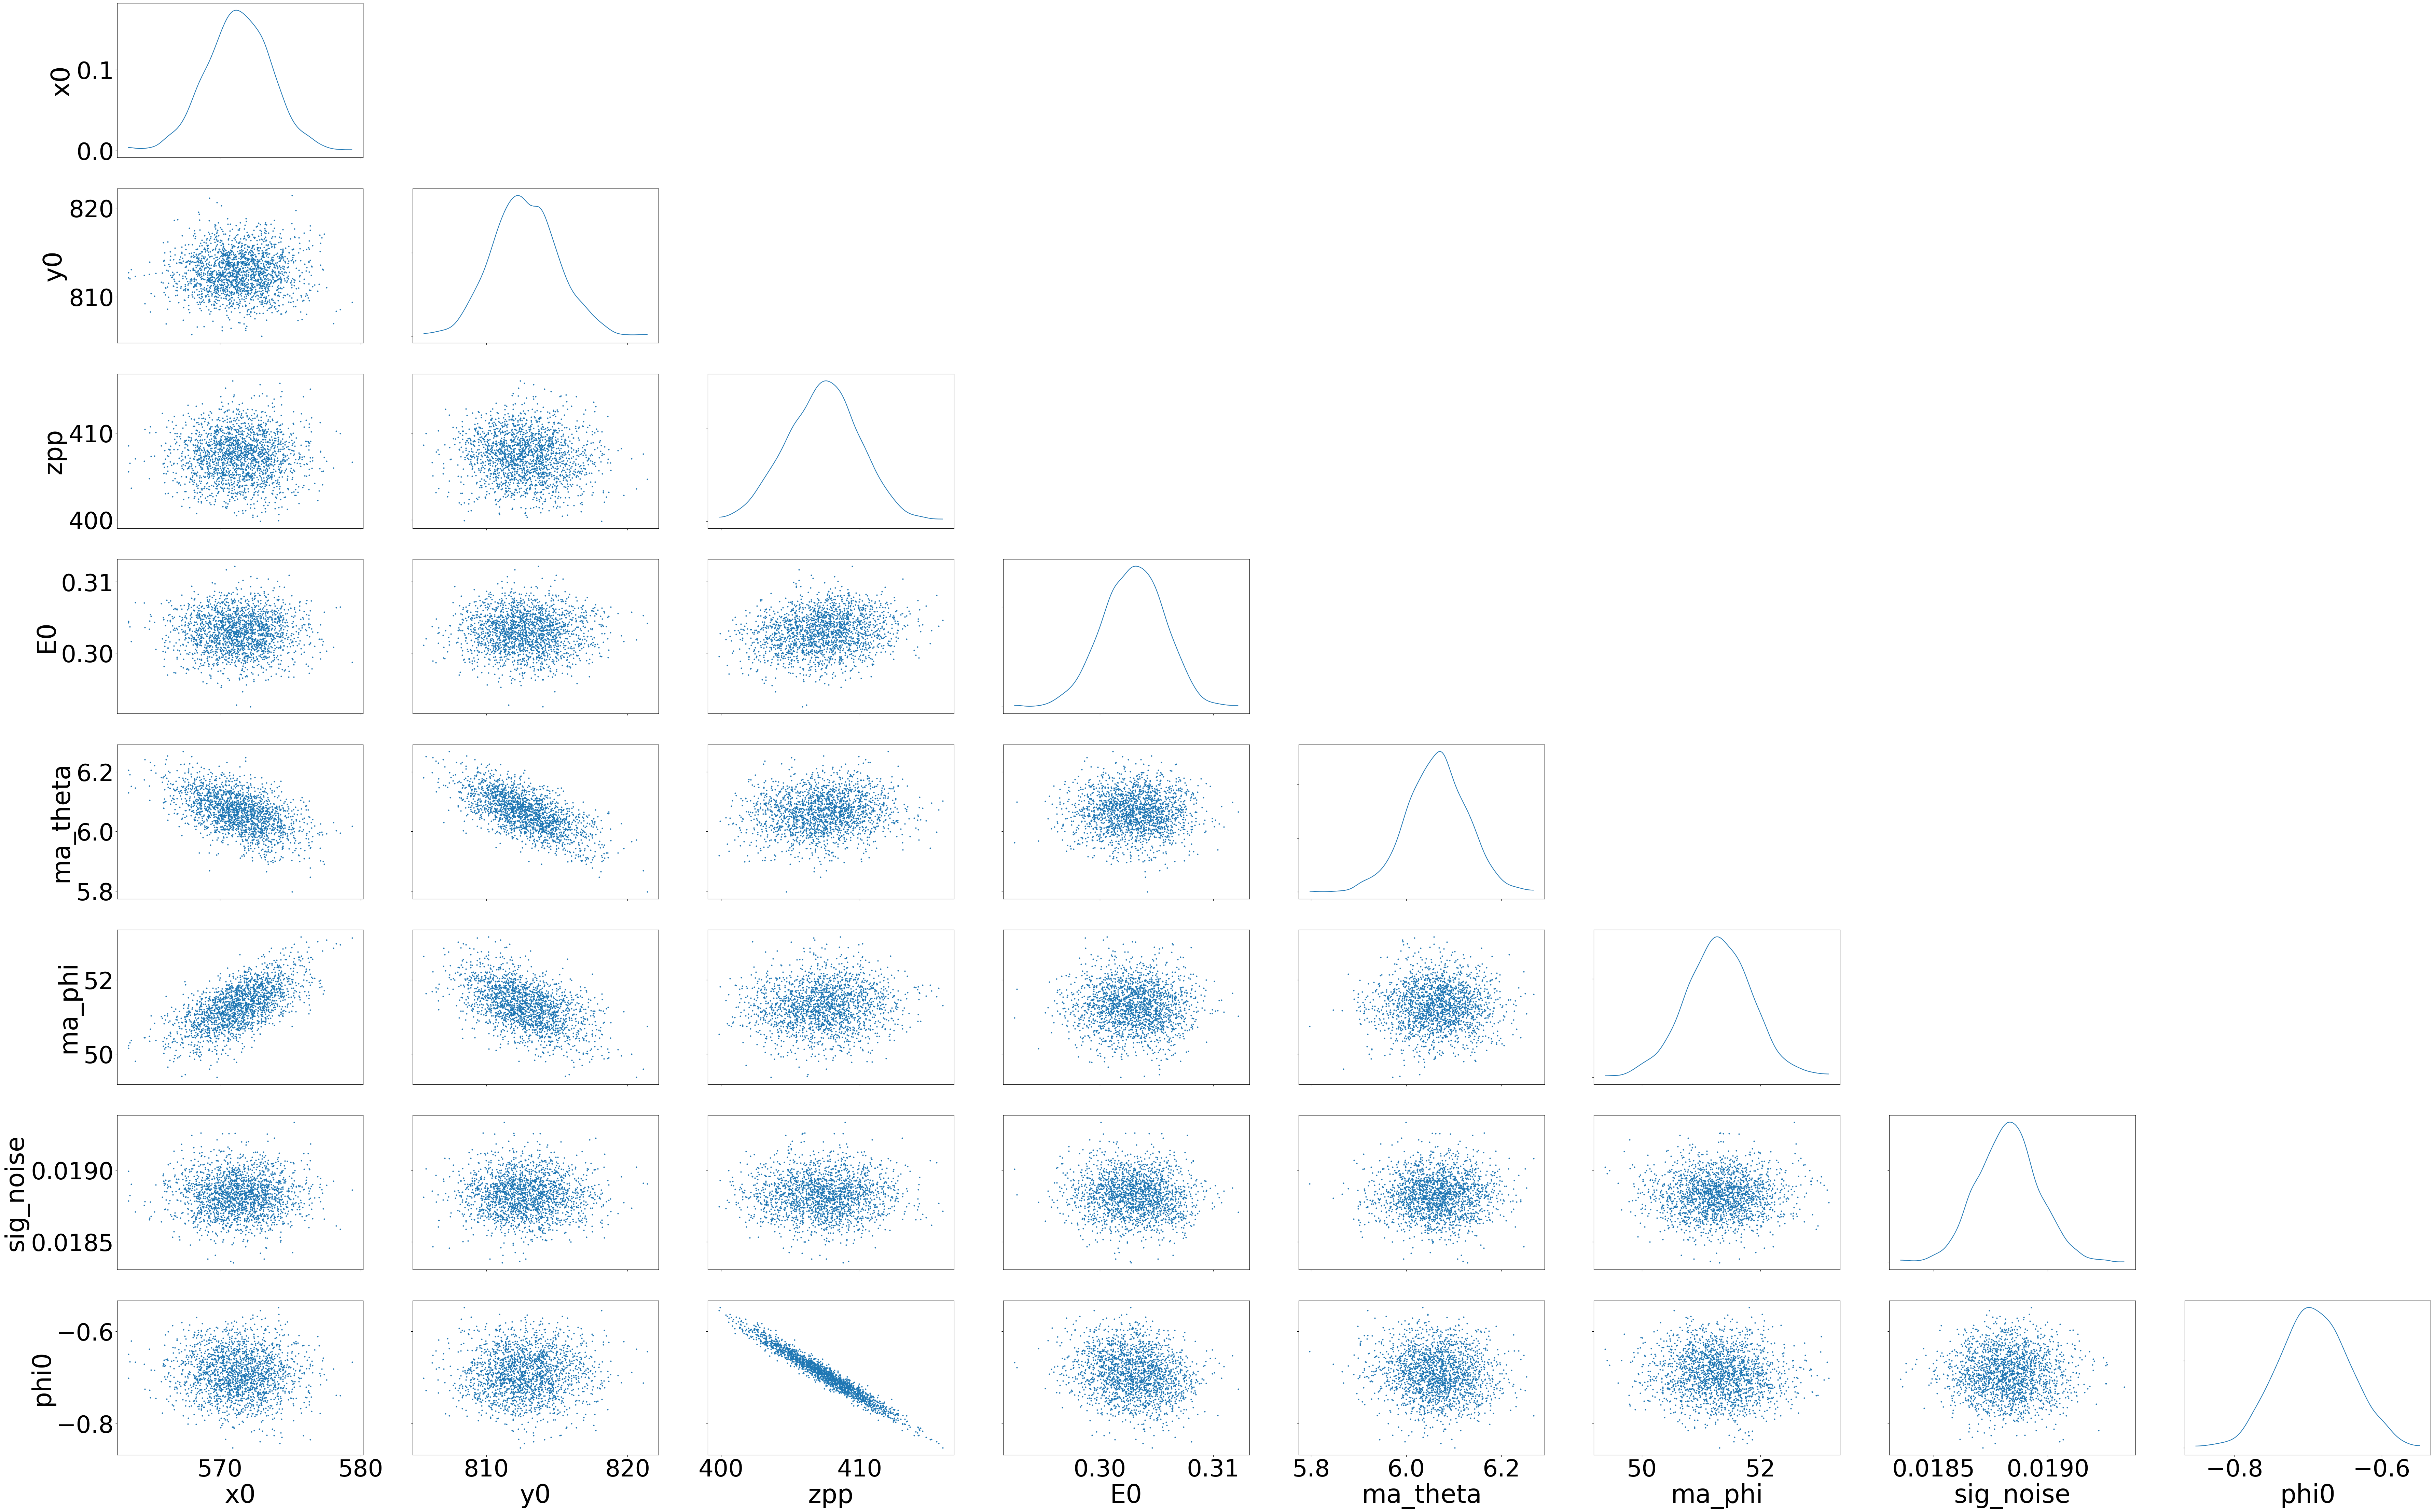

In [18]:
with beam_model:
    az.plot_trace(idata_beam)
    az.plot_pair(idata_beam, marginals=True, textsize=40)
    
with iPSF_model:
    az.plot_trace(idata)
    az.plot_pair(idata, marginals=True, var_names=['~aphi0','~sphi0'], textsize=50)

We can see that we get well-defined informative posteriors on all our parameters.

Considering the correlations, the most notable correlations are between the phase $\phi_0$, the axial position $z_p'$ and (to a lesser degree) the amplitude $E_0$. This is intuitive: the axial position primarily affects the phase (through the OPD between the scattered and reference beam) and the amplitude of the iPSF (the further away the particle, the lower the intensity on the detector). This results in the strong correlations between these variables that are evident from the pair plot. However, as a 'secondary effect', the axial position also affects the distance between fringes and their relative amplitudes, so that based on that information, the axial position can still be independently infered.

Finally, we also note some significant correlation between the misalignment angles and the horizontal position of the particle, which follows from geometric considerations of the centerpoint of the deformed fringes.

## Results

### Focal sweep of 120 nm polystyrene particle on coverslip

Here, we show the results for the 120 nm polystyrene particle stuck to the coverslip, where we translate the focal plane from below the particle to being at the particle with a translation rate of around 10 nm per frame. A movie of the processed data is shown below.

<center><video controls src="data/sweep_movie.mp4" /></center>

The full production script is provided in `ps120_sweep_series_fit.py` and we show the main results for the mean posterior fit parameters with uncertainties (standard deviations) here.

In [19]:
#LOAD SUMMARY STATISTICS
import pickle

file = Path.cwd() / Path('data/summaries.pyob')
with open(file,"rb") as fp:
    summaries=pickle.load(fp)
    fp.close()
    
file = Path.cwd() / Path('data/summaries_beam.pyob')
with open(file,"rb") as fp:
    summaries_beam=pickle.load(fp)
    fp.close()

ss=[0,207]
summaries=summaries[ss[0]:ss[1]] ; summaries_beam=summaries_beam[ss[0]:ss[1]]

First, let's look at the beam parameters. We plot the posterior mean (solid line) and standard deviation (shaded area).

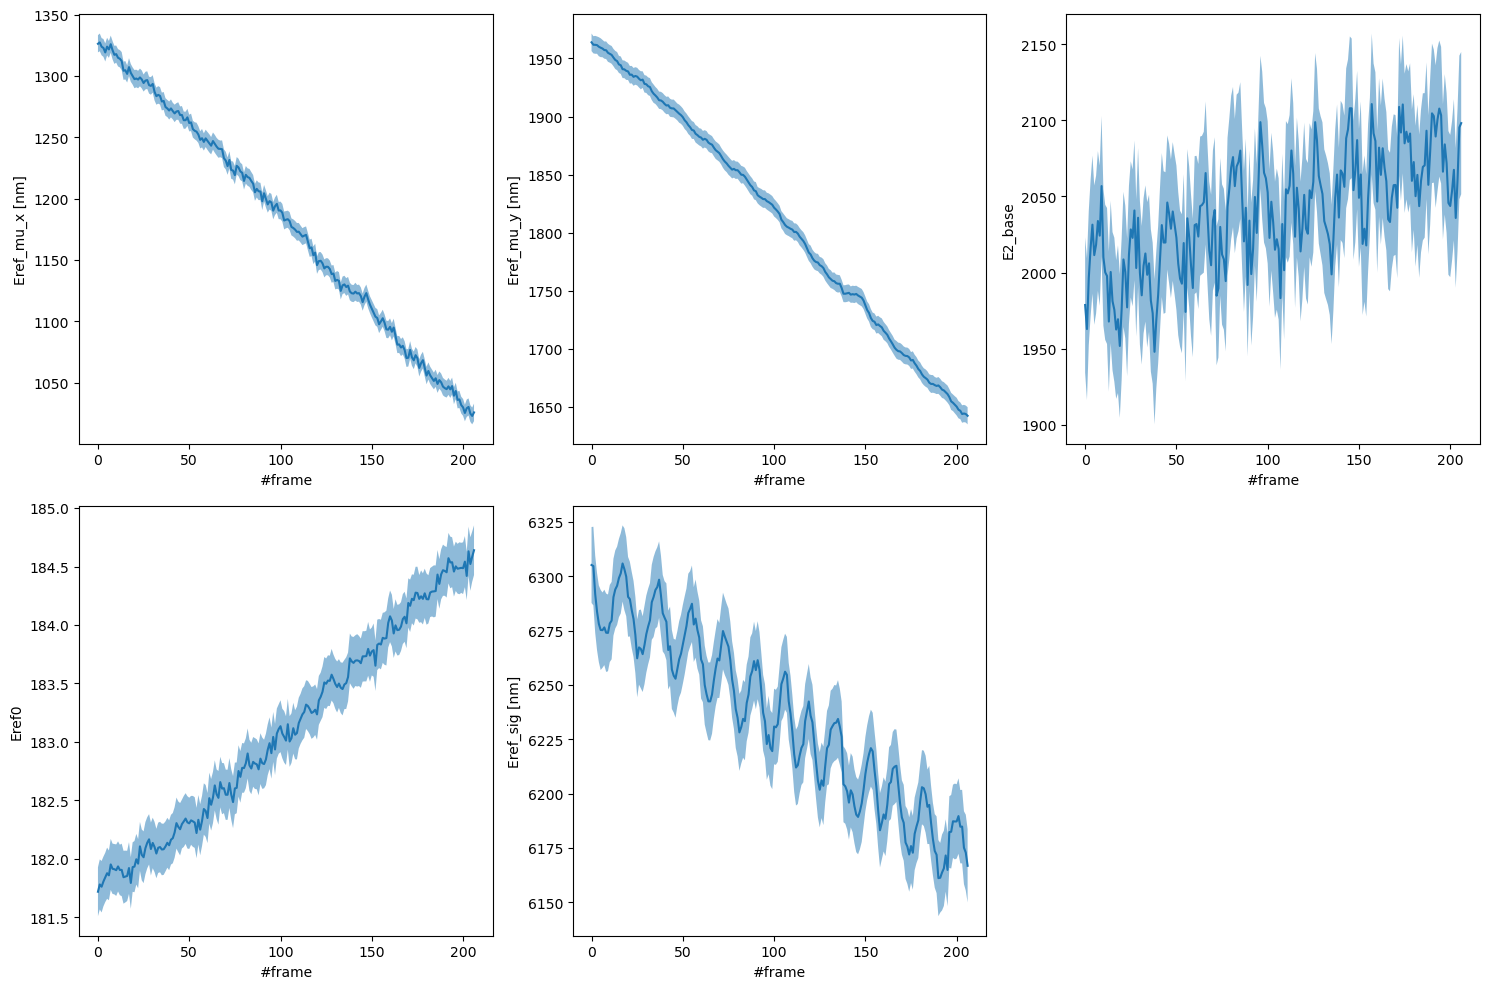

In [20]:
#BEAM PARAMETERS
fig, axs = plt.subplots(2, 3, figsize=(15,10)) ; fig.delaxes(axs[1,2])
mvars=summaries_beam[0].index.values
for i in range(len(mvars)):
    mvar = mvars[i]
    var_means=np.array([summary['mean'][mvar] for summary in summaries_beam])
    var_sds=np.array([summary['sd'][mvar] for summary in summaries_beam])
    
    axs[int(i/3),i%3].plot(np.arange(len(var_means)),var_means)
    axs[int(i/3),i%3].fill_between(np.arange(len(var_means)), var_means-var_sds, var_means+var_sds, alpha=0.5)
    if mvar in ['Eref_mu_x','Eref_mu_y','Eref_sig']:
        axs[int(i/3),i%3].set_ylabel(mvar+' [nm]')
    else:
        axs[int(i/3),i%3].set_ylabel(mvar)
    axs[int(i/3),i%3].set_xlabel('#frame')
fig.tight_layout()
plt.show()

Here, we note that as the focus is swept upwards, the center of the beam shifts as a consequence of the misalignment of the beam. Indeed, one can calculate an estimate for the misalignment angles from this shift of the beam center. This coincides satisfactorily with the estimates that we obtain from the direct fit of the iPSF (i.e. $\theta_b\approx 5.6 ^\circ$ and $\phi_b\approx 52 ^\circ$). Furthermore, we note a slight decrease of the width of the beam and increase of the amplitude with shifting of the focus, which may indicate that the beam is ever so slightly divergent.

Perhaps more interestingly, we can also consider the fit parameters of the iPSF itself.

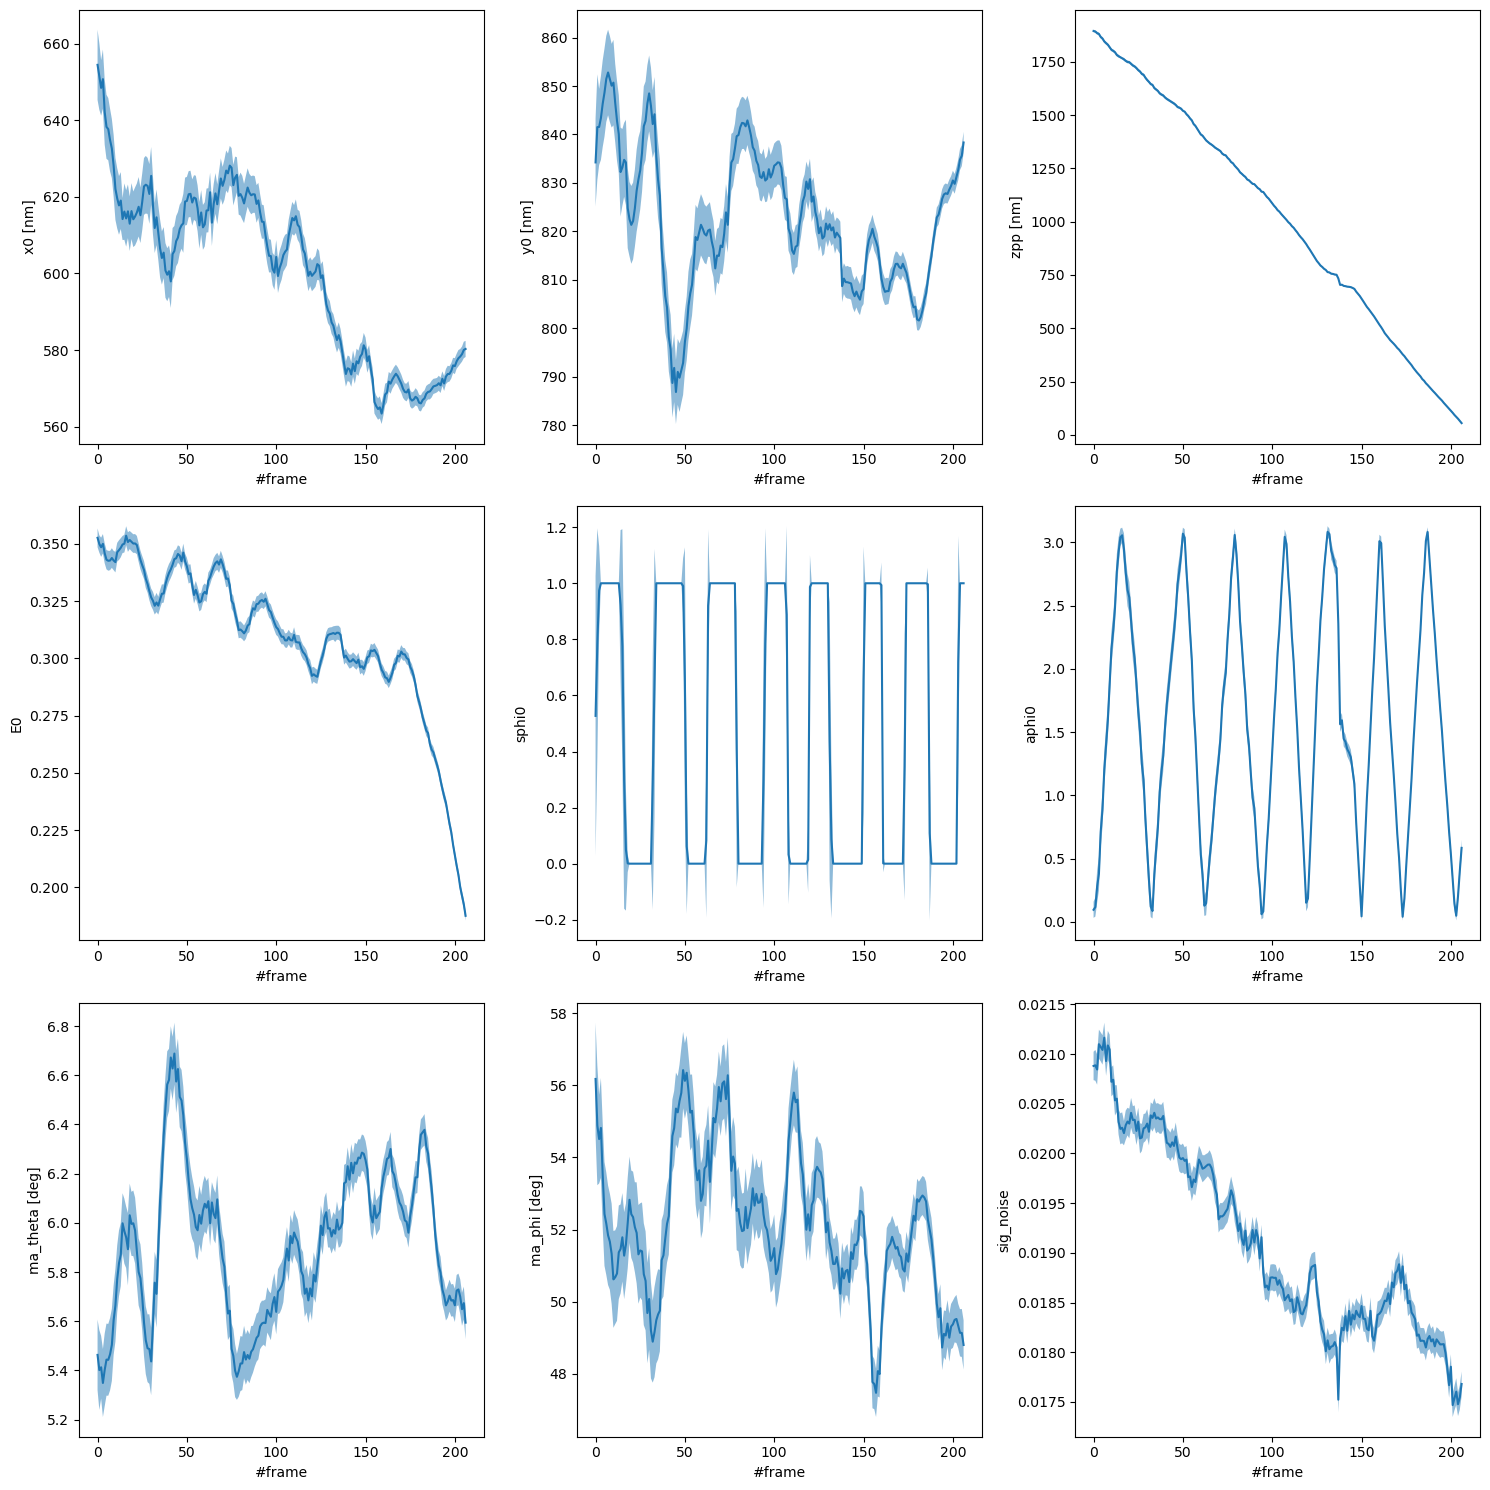

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
mvars=summaries[0].index.values[[1,2,3,6,0,4,7,8,9]]
for i in range(len(mvars)):
    mvar = mvars[i]
    var_means=np.array([summary['mean'][mvar] for summary in summaries])
    var_sds=np.array([summary['sd'][mvar] for summary in summaries])

    axs[int(i/3),i%3].plot(np.arange(len(var_means)),var_means)
    axs[int(i/3),i%3].fill_between(np.arange(len(var_means)), var_means-var_sds, var_means+var_sds, alpha=0.5)
    if mvar in ['x0','y0','zpp']:
        axs[int(i/3),i%3].set_ylabel(mvar+' [nm]')
    elif mvar in ['ma_theta','ma_phi']:
        axs[int(i/3),i%3].set_ylabel(mvar+' [deg]')
    else:
        axs[int(i/3),i%3].set_ylabel(mvar)
    axs[int(i/3),i%3].set_xlabel('#frame')
fig.tight_layout()
plt.show()

Here we note that the particle largely stays in place horizontally. As expected, the distance of the particle above the coverslip decreases as we bring the focus up towards the particle. The amplitude of the scatterer remains mostly constant, but when the focus gets very close to the particle, significant deviations can be observed. This could be due to the far-field assumption being violated or because of Mie scattering effects that are neglected in the Rayleigh approximation. 

Furthermore, we note that we find mostly consistent results for the misalingment angles.

The phase factor is expected to vary as the focal plane is shifted according to $\Delta \phi_0 = 2 k \Delta z_f$. This allows us to assess more quantitatively whether the particle is estimated to remain at a constant axial position by taking into account the shift of the focal plane as deducted from $\phi_0$ combined with the axial position above the focus $z_p'$. To asses the uncertainty in this measure, we do the addition on the samples itself, rather than on their means, in order to take the full correlations into account. The results are shown below.

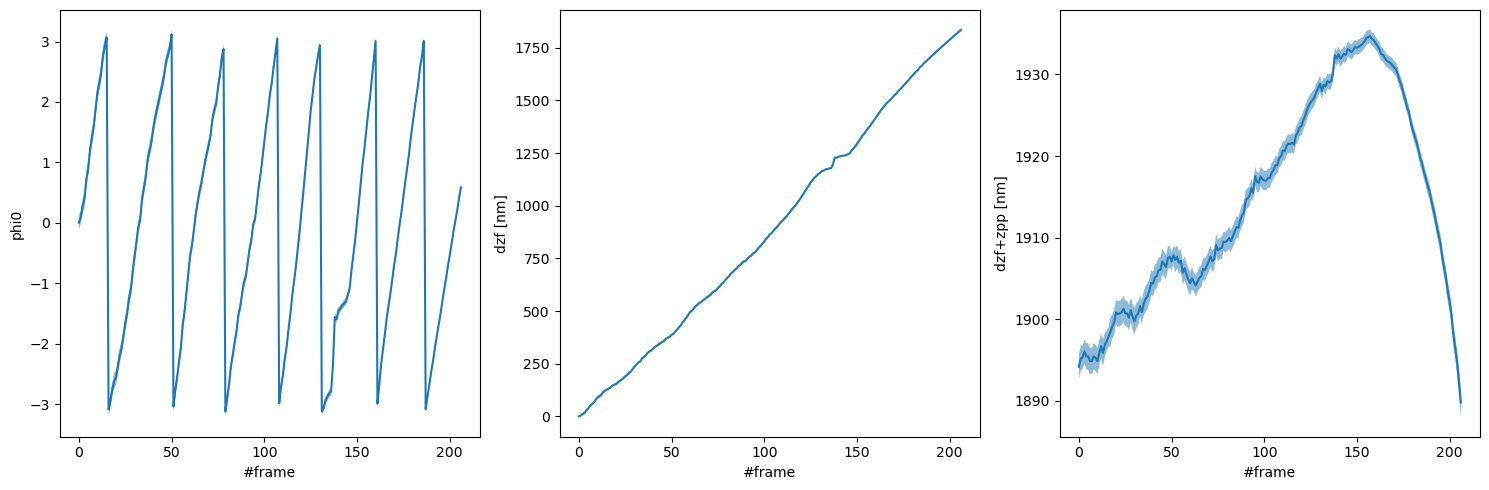

In [22]:
file = Path.cwd() / Path('data/corrected_phi0s.pyob')
with open(file,"rb") as fp:
    corrected_phi0s=pickle.load(fp)
    fp.close()

file = Path.cwd() / Path('data/std_dzf_plus_zpps.pyob')
with open(file,"rb") as fp:
    std_dzf_plus_zpps=pickle.load(fp)
    fp.close()

corrected_phi0s=np.array(corrected_phi0s[ss[0]:ss[1]]) ; std_dzf_plus_zpps=np.array(std_dzf_plus_zpps[ss[0]:ss[1]])

k=2*np.pi/(635/1.5)/1.222

phi0_means = corrected_phi0s[:,0]
phi0_sds = corrected_phi0s[:,1]

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(np.arange(len(phi0_means)),phi0_means)
axs[0].fill_between(np.arange(len(phi0_means)), phi0_means-phi0_sds, phi0_means+phi0_sds, alpha=0.5)
axs[0].set_ylabel('phi0')
axs[0].set_xlabel('#frame')

#calculate incremented phase
phi0s=phi0_means.copy()
for iphi0 in range(1,len(phi0s)):
    if phi0s[iphi0-1]-phi0s[iphi0]>np.pi:
        phi0s[iphi0:] += 2*np.pi

dzfs=0.5*phi0s/k
dzfs_sds=0.5*phi0_sds/k

axs[1].plot(np.arange(len(dzfs)),dzfs)
axs[1].fill_between(np.arange(len(dzfs)), dzfs-dzfs_sds, dzfs+dzfs_sds, alpha=0.5)
axs[1].set_ylabel('dzf [nm]')
axs[1].set_xlabel('#frame')

zpp_means=np.array([summary['mean']['zpp'] for summary in summaries])
zpp_sds=np.array([summary['sd']['zpp'] for summary in summaries])

dzf_plus_zpp = dzfs + zpp_means
dzf_plus_zpp_sds=np.array(std_dzf_plus_zpps)

axs[2].plot(np.arange(len(dzf_plus_zpp)),dzf_plus_zpp)
axs[2].fill_between(np.arange(len(dzf_plus_zpp)), dzf_plus_zpp-std_dzf_plus_zpps, dzf_plus_zpp+std_dzf_plus_zpps, alpha=0.5)
axs[2].set_ylabel('dzf+zpp [nm]')
axs[2].set_xlabel('#frame')
fig.tight_layout()
plt.show()

Note in the rightmost plot that indeed, the net axial position of the particle remains largely constant, although again significant deviations can be found very close to the particle. The remaining slight systematic increase further away from the particle (in the frames 0-150) could possibly be explained by any minor inaccuracies in the calibration of the size per pixel and/or the wavelength or could plausibly be an effect of the optical train that is not taken into account. Quantitatively, this structural error is around 40 nm over the total swept distance of 1800 nm, amounting to around 2\%.

A note on picking the appropriate wavenumber $k$: it seems that the wavenumber that results in a satisfactory fit to the data is somewhat off from what we expect based on the refractive index and laser wavelength. This deficiency is plausibly attributed to neglected aberrations in the optical train. We therefore tune this wavenumber empirically to obtain a satisfactory fit to the data. To streamline this process, the `k_rel_var` in the inference model can be used (iteratively) to vary the wavenumber around a first estimate. Any remaining errors in the observed wavenumber will contribute to the structural error of the model.

### Tracking of a diffusing 50-100 nm polystyrene particle

Next, we show the results of a 3D particle tracking experiment of a 50 to 100 nm polystyrene particle freely diffusing in water. The processed data is shown in the video below.

<center><video controls src="data/diff_movie.mp4" /></center>

We use the full model with beam, although we fix the misalignment angles to the previously established values in order to improve the fitting performance.

Moreover, we also fix the phase `phi0`, because the focus is kept constant throughout the experiment. This improves the accuracy of the axial tracking, as `zpp` can now also be used to match the phase of the iPSF. However, this renders the posterior landscape multimodel in `zpp` (e.g. locally peaking at least every half wavelength), such that we need to resort to the SMC sampler for fitting this multimodel posterior landscape. Since the data are not informative enough to obtain a credible estimate for the true `phi0` in this experiment, we select an arbitrary constant `phi0`. While this may result in an offset in `zpp` of up to half a wavelength, the relative displacements will remain largely unaffected by this choice.

We use the posterior estimate for the 3D position of one frame as a prior to the next frame, using a standard deviation of 150 nm to account for the diffusion between consecutive frames. The full production script is provided in `ps50_diff_series_fit.py`. We provide the main results below.

In [24]:
#LOAD DATA
file = Path.cwd() / Path('data/summaries_diff.pyob')
with open(file,"rb") as fp:
    summaries=pickle.load(fp)
    fp.close()

First, we look at time series of the fitted amplitude and noise level

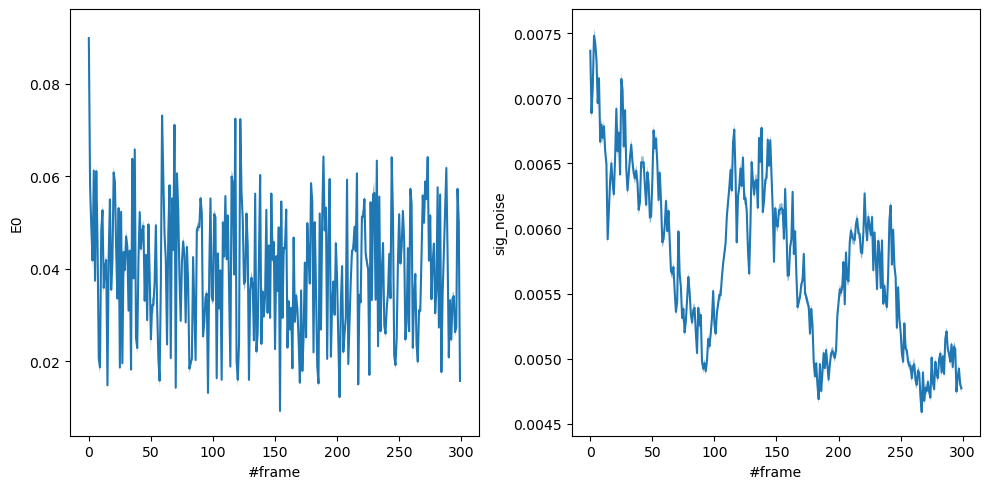

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
mvars=summaries[0].index.values[[3,4]]
for i in range(len(mvars)):
    mvar = mvars[i]
    var_means=np.array([summary['mean'][mvar] for summary in summaries])
    var_sds=np.array([summary['sd'][mvar] for summary in summaries])

    axs[i].plot(np.arange(len(var_means)),var_means)
    axs[i].fill_between(np.arange(len(var_means)), var_means-var_sds, var_means+var_sds, alpha=0.5)
    axs[i].set_ylabel(mvar)
    axs[i].set_xlabel('#frame')
fig.tight_layout()
plt.show()

Here, we note that the amplitude signal $E_0$ is highly fluctuating. These fluctuations could be attributed to the presence of axial motion blur. The typical diffusion distance in one exposure time (2 ms) is on the order of 110 nm, which is close to a quarter of the wavelength (~ 140 nm) needed to flip the sign of the interference pattern, i.e. result in a phase shift of $\pm\pi$.

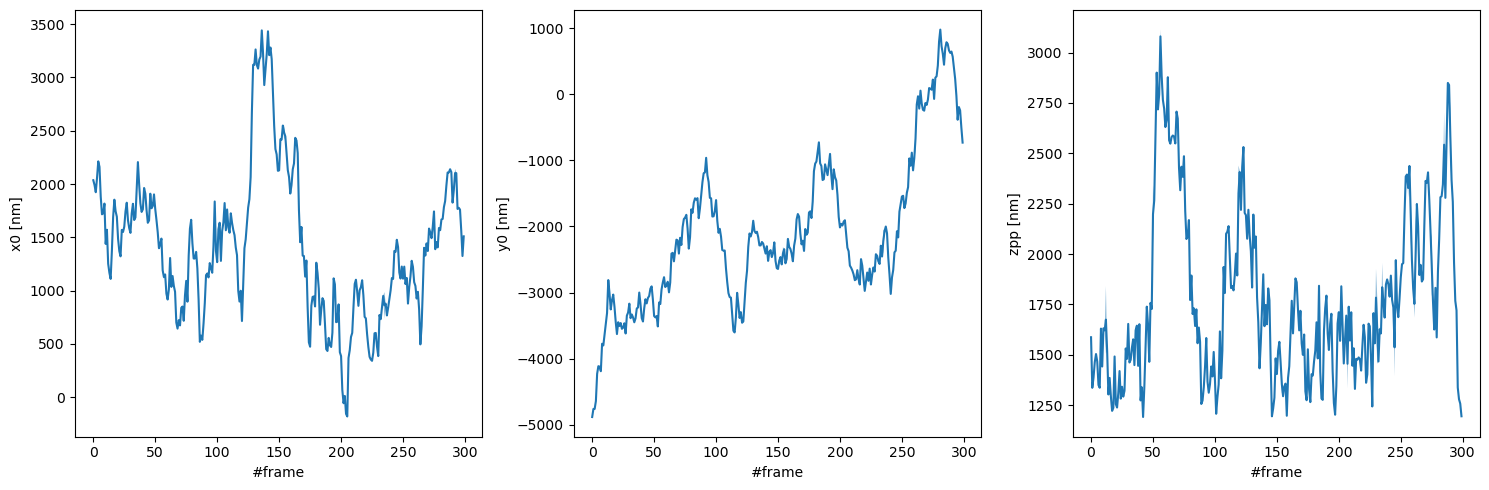

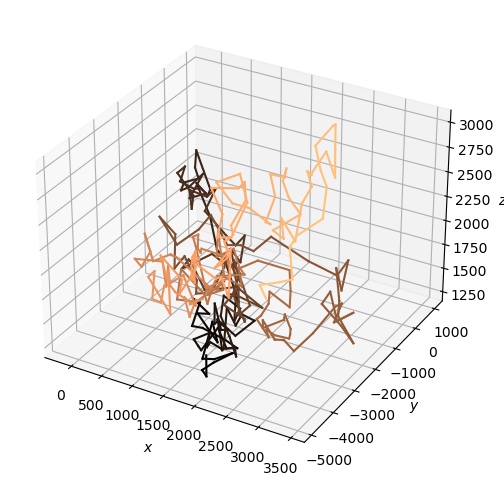

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
mvars=summaries[0].index.values[[0,1,2]]
for i in range(len(mvars)):
    mvar = mvars[i]
    var_means=np.array([summary['mean'][mvar] for summary in summaries])
    var_sds=np.array([summary['sd'][mvar] for summary in summaries])

    axs[i].plot(np.arange(len(var_means)),var_means)
    axs[i].fill_between(np.arange(len(var_means)), var_means-var_sds, var_means+var_sds, alpha=0.5)
    axs[i].set_ylabel(mvar+' [nm]')
    axs[i].set_xlabel('#frame')
fig.tight_layout()
plt.show()

#3D trajectory
x0_means = np.array([summary['mean']['x0'] for summary in summaries])
y0_means = np.array([summary['mean']['y0'] for summary in summaries])
zpp_means = np.array([summary['mean']['zpp'] for summary in summaries])

plt.figure()
ax = plt.axes(projection='3d')
N=len(x0_means)
for i in range(N-1):
    ax.plot(x0_means[i:i+2], y0_means[i:i+2], zpp_means[i:i+2], color=plt.cm.copper(i/N))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()

Above are the results for the 3D particle tracking. The statistical uncertainty in the tracking is around 8 nm in both the horizontal as well as the vertical directions.

To obtain the diffusion coefficient, we fit the trajectory, including the uncertainties therein, to a Gaussian random walk using PyMC. We separately treat the horizontal and vertical directions.

C:\Users\vnm\mambaforge\envs\iscat-model\Lib\site-packages\pymc\distributions\timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
C:\Users\vnm\mambaforge\envs\iscat-model\Lib\site-packages\pymc\distributions\timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
C:\Users\vnm\mambaforge\envs\iscat-model\Lib\site-packages\pymc\distributions\timeseries.py:293: UserWarning: Initial distribution not specified, defaulting to `Normal.dist(0, 100)`.You can specify an init_dist manually to suppress this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag_grad...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [D_xy, D_z, x, y, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


mean       sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
D_xy  5658.770  328.722  5061.366  6315.681      3.009    2.180   12088.0   
D_z   4705.638  377.194  3977.580  5393.027      3.924    2.907    9851.0   

      ess_tail  r_hat  
D_xy    2677.0    1.0  
D_z     2549.0    1.0

Diffusion coefficients in nm^2/ms, multiply by 10^-15 to find it in m^2/s


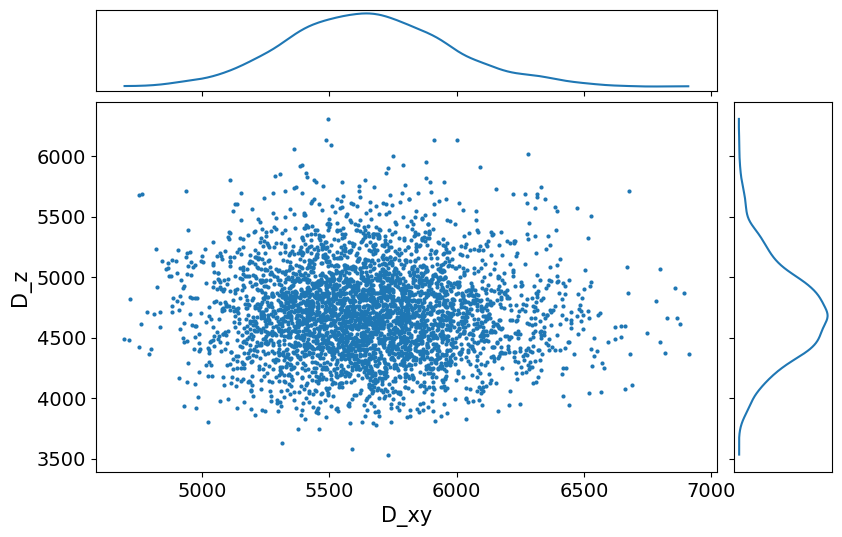

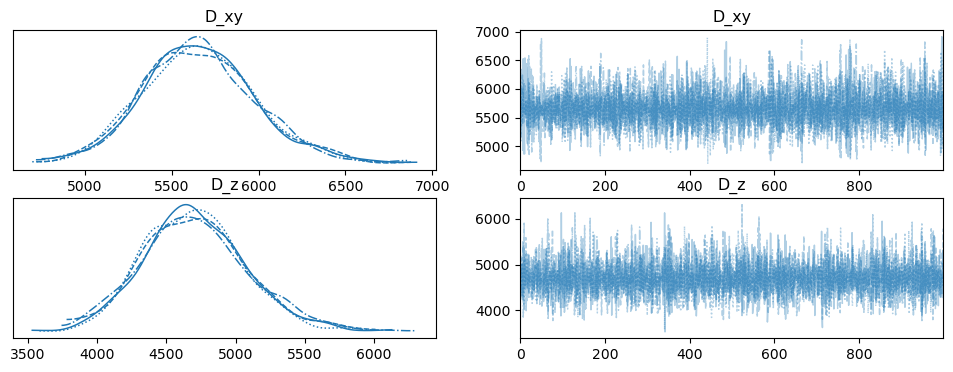

In [27]:
x0_means = np.array([summary['mean']['x0'] for summary in summaries])
x0_sds = np.array([summary['sd']['x0'] for summary in summaries])

y0_means = np.array([summary['mean']['y0'] for summary in summaries])
y0_sds = np.array([summary['sd']['y0'] for summary in summaries])

zpp_means = np.array([summary['mean']['zpp'] for summary in summaries])
zpp_sds = np.array([summary['sd']['zpp'] for summary in summaries])

dt = 3 #ms

brown_model = pm.Model()
with brown_model:

    # Priors for unknown model parameters
    D_xy=pm.Gamma("D_xy", mu=3.0e3, sigma=2.0e3) #nm^2/ms
    D_z=pm.Gamma("D_z", mu=3.0e3, sigma=2.0e3) #nm^2/ms
    
    #Trajectory
    x = x0_means[0] + pm.GaussianRandomWalk('x', sigma=pm.math.sqrt(2*D_xy*dt), shape=x0_means.shape[0])
    y = y0_means[0] + pm.GaussianRandomWalk('y', sigma=pm.math.sqrt(2*D_xy*dt), shape=y0_means.shape[0])
    z = zpp_means[0] + pm.GaussianRandomWalk('z', sigma=pm.math.sqrt(2*D_z*dt), shape=zpp_means.shape[0])
    
    # Likelihood (sampling distribution) of observations
    X_obs = pm.Normal("X_obs", mu=x, sigma=x0_sds, observed=x0_means)
    Y_obs = pm.Normal("Y_obs", mu=y, sigma=y0_sds, observed=y0_means)
    Z_obs = pm.Normal("Z_obs", mu=z, sigma=zpp_sds, observed=zpp_means)
    
    
with brown_model:
    # new initialization method jitter+adapt_diag_grad doesn't require as many tuning samples
    idata = pm.sample(1000, tune=1000, init='jitter+adapt_diag_grad', cores=CORES, return_inferencedata=True)
    
with brown_model:
    summary = az.summary(idata)
    display(summary.loc['D_xy':'D_z'])
    print('Diffusion coefficients in nm^2/ms, multiply by 10^-15 to find it in m^2/s')
    az.plot_pair(idata, var_names=['D_xy','D_z'], marginals=True)
    az.plot_trace(idata, var_names=['D_xy','D_z'])

This provides an accurate estimate of the diffusion coefficient of the studied particle.

Note, however, that there is a slight disagreement between the horizontal and vertical diffusion coefficient. Although part of this discrepancy may be explained by any inaccuracies in the calibration of the pixel size and/or wavelength, it is also plausible that there is a physical explanation for it. Judging from the vertical trajectory of the particle, it seems that it is diffusing around some equilibrium value $z_p'\approx 1500 \textrm{ nm}$. This could be a result of the interplay between gravity and (electrostatic) interactions with the coverslip, such that the particle is not freely diffusing vertically, but rather diffusing in a potential. Hints for this hypothesis can also be appreciated from the histograms of the trajectory below, where the horizontal positions seem largely gaussian, while the vertical position seems to be notably skewed, peaking around $z_p'\approx 1500 \textrm{ nm}$. To confirm this hypothesis more credibly and to infer any possible effective potential, longer time series statistics would be required.

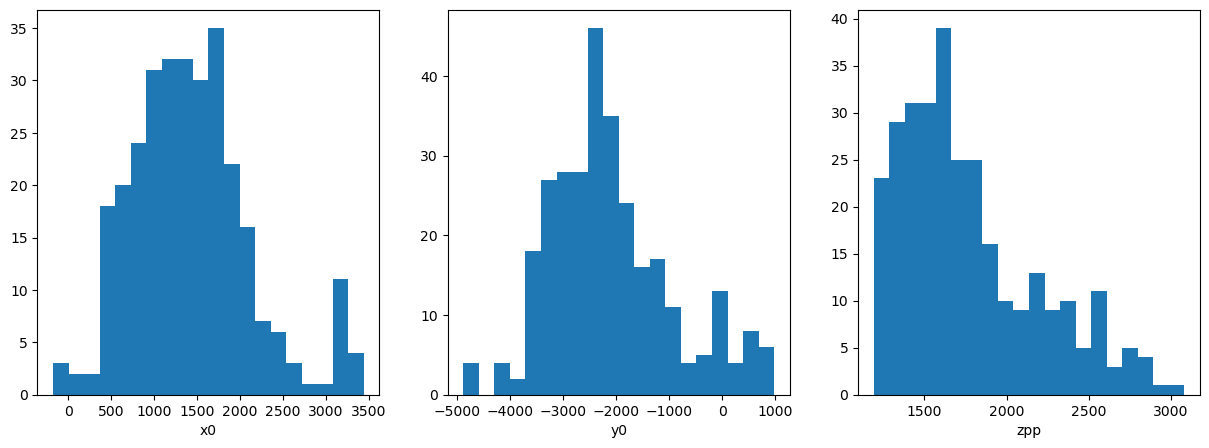

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].hist(x0_means, bins=20)
axs[0].set_xlabel('x0')

axs[1].hist(y0_means, bins=20)
axs[1].set_xlabel('y0')

axs[2].hist(zpp_means, bins=20)
axs[2].set_xlabel('zpp')

plt.show()

We would thus argue that the obtained horizontal diffusion coefficient is the more reliable estimate for the true free diffusion coefficient, yielding $D\approx 5.6\pm0.3\times10^{-12}\textrm{ m$^2$/s}$. Using the Stokes-Einstein relation, this estimates the particle diameter to be around $78\pm 5$ nm, which is consistent with our expectations from the manufacturer.

In [29]:
#simulation function
def sim_iPSF_no_beam(xv, yv, k, x0, y0, zpp, E0, phi0, ma_theta, ma_phi):

    #misalignment phase
    ma = k*((xv-x0)*np.cos(ma_phi*np.pi/180)+(yv-y0)*np.sin(ma_phi*np.pi/180))*np.sin(ma_theta*np.pi/180)

    rpp = np.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to position on focal plane
    cos_theta = zpp / rpp #cos of scattering angle
    phi_inc = k*zpp #phase shift due to incedent OPD, zf is lumped into phi0
    phi_sca = k*rpp #phase shift due to return OPD
    fac = np.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
    Escat = E0*fac #scattering amplitude
    
    phi_diff = ma-(phi0+phi_inc+phi_sca) #phase difference between reference and scatterer
    iPSF = 2*Escat*np.cos(phi_diff) #final iPSF
    
    return iPSF

#inference function
def infer_particle_no_beam(iPSF_data, xv, yv, k_0, k_rel_var=None,
                           crop=(0,-1,0,-1), sig_noise_mu=0.001, sig_noise_sig=0.001, fixed_sig_noise=None,
                           zpp_mu=300, zpp_sig=300, fixed_zpp=None,
                           E0_mu=0.3, E0_sig=0.2, x0_mu=0, y0_mu=0, xy0_sig=1000,
                           fixed_phi0=None, fixed_ma_theta=None, fixed_ma_phi=None,
                           samples=500, cores=1, init='jitter+adapt_diag_grad'):
        
    #CROP
    iPSF_data = iPSF_data[crop[0]:crop[1],crop[2]:crop[3]]
    xv = xv[crop[0]:crop[1],crop[2]:crop[3]] ; yv = yv[crop[0]:crop[1],crop[2]:crop[3]]

    #DEFINE MODEL
    iPSF_model = pm.Model()
    with iPSF_model:

        # PRIORS
        if fixed_zpp is None:
            zpp = pm.Gamma("zpp", mu=zpp_mu, sigma=zpp_sig)
        else:
            zpp = fixed_zpp
        
        if fixed_phi0 is None:
            aphi0 = pm.Uniform("aphi0", lower=0, upper=np.pi)
            sphi0 = pm.Bernoulli("sphi0", p=0.5)
            phi0 = (2*sphi0-1)*aphi0 #sign phi0
            phi0 = pm.Deterministic("phi0", phi0)
        else:
            phi0 = fixed_phi0
        
        E0 = pm.Gamma("E0", mu=E0_mu, sigma=E0_sig)
        
        if fixed_ma_theta==None:
            ma_theta = pm.TruncatedNormal("ma_theta", mu=5, sigma=3, lower=0.0, upper=15)
        else:
            ma_theta = fixed_ma_theta
        if fixed_ma_phi==None:
            ma_phi = pm.TruncatedNormal("ma_phi", mu=45, sigma=20, lower=0, upper=90)
        else:
            ma_phi = fixed_ma_phi
        
        x0 = pm.Normal('x0', mu=x0_mu, sigma=xy0_sig)
        y0 = pm.Normal('y0', mu=y0_mu, sigma=xy0_sig)
        
        if k_rel_var==None:
            k = k_0
        else:
            kfac = pm.Normal("kfac", mu=1, sigma=k_rel_var)
            k = k_0*kfac
        
        if fixed_sig_noise is None:
            sig_noise = pm.Gamma('sig_noise', mu=sig_noise_mu, sigma=sig_noise_sig)
        else:
            sig_noise = fixed_sig_noise
        
            
        # calculate iPSF
        
        if fixed_ma_theta is None or fixed_ma_phi is None:
            ma = k*((xv-x0)*pm.math.cos(ma_phi*np.pi/180)+(yv-y0)*pm.math.sin(ma_phi*np.pi/180))*pm.math.sin(ma_theta*np.pi/180)
        else:
            ma = k*((xv-x0)*np.cos(ma_phi*np.pi/180)+(yv-y0)*np.sin(ma_phi*np.pi/180))*np.sin(ma_theta*np.pi/180)
               
        rpp = pm.math.sqrt((xv-x0)**2 + (yv-y0)**2 + zpp**2) #from particle to focal plane
        cos_theta = zpp / rpp #cos of scattering angle
        phi_inc = k*zpp #phase shift due to incedent OPD, zf is lumped into phi0
        phi_sca = k*rpp #phase shift due to return OPD
        fac = pm.math.sqrt(1+cos_theta**2)*1/(k*rpp) #amplitude factor
        Escat = E0*fac #scattering amplitude

        phi_diff = ma-(phi0+phi_inc+phi_sca)
        iPSF = 2*Escat*pm.math.cos(phi_diff) 

        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal("Y_obs", mu=iPSF, sigma=sig_noise, observed=iPSF_data)
        
    with iPSF_model:        
        if fixed_phi0 is None:
            # draw 500 posterior samples, feel free to increase the number of employed cores
            idata = pm.sample(samples, cores=cores, init=init, return_inferencedata=True)
        else:
            # SMC sampling robust to multimodal posterior, feel free to increase the number of chains
            # Parallel computing does not seem to work with this SMC implementation (bug)
            idata = pm.sample_smc(samples, cores=cores, parallel=True)
            #trace = az.from_pymc3(trace_pymc3)
        
    with iPSF_model:        
        summary = az.summary(idata, round_to=10)
        display(summary)
        
    return iPSF_model, idata, summary

### Lambda phage DNA ejection

Finally, and perhaps most interestingly, we show that this method can also be used to measure individual virus particles. Here, we take a look at the process where a lambda phage virus that is stuck onto the coverslip is ejecting its DNA. By fitting to the iPSF of the virus, we can obtain the time series of the scattering intensity $E_0$ to study this ejection process.

For the image processing, in the last step, we subtract the median of the final 100 frames of the recording. Although this successfuly gets rid of the constant speckle-like noise pattern, at the same time, it subtracts any remainig scattering contribution from the empty virus capsid. However, since it is expected that the scattering of the lambda phage is dominated by the scattering from its DNA, we expect that this has no significant effect on our outcomes.

An example video of the cropped iPSF of an ejection event is provided below. The full analysis script is provided in `lambda_series_fit.py`

<center><video controls src="data/lambda_movie.mp4" /></center>

Below, we show the time series resulting from the fits for the scattering amplitude $E_0$, axial position $z_p'$ and phase $\phi_0$. The recording frequency is 10 Hz.

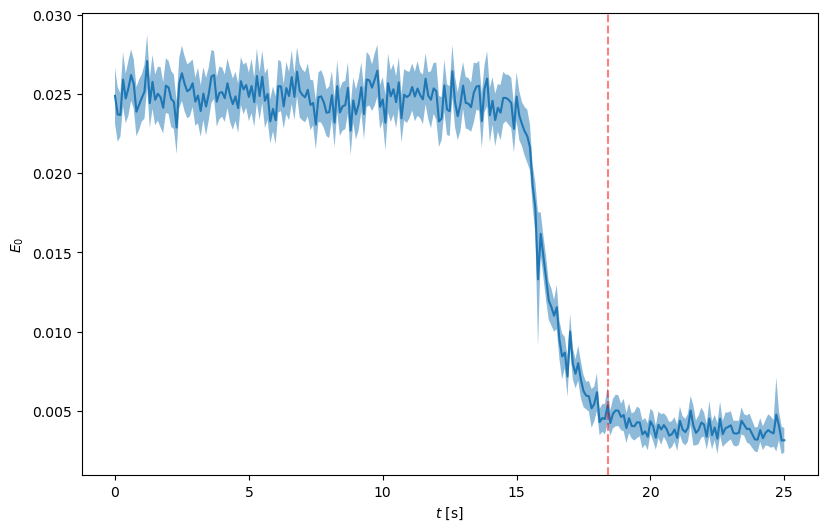

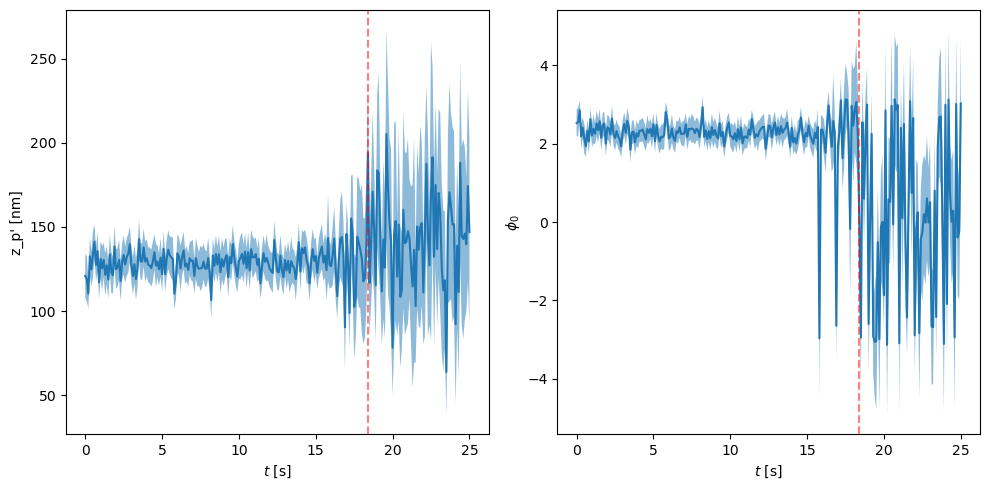

In [30]:
import pickle
    
#LOAD DATA
file = Path.cwd() / Path('data/summaries_lambda_vzpp.pyob')
with open(file,"rb") as fp:
    summaries=pickle.load(fp)
    fp.close()

file = Path.cwd() / Path('data/corrected_phi0s_lambda_vzpp.pyob')
with open(file,"rb") as fp:
    corrected_phi0s=pickle.load(fp)
    fp.close()

dt=0.1 #seconds

frame_off = 184;

#PLOT
E0_means=np.array([summary['mean']['E0'] for summary in summaries])
E0_sds=np.array([summary['sd']['E0'] for summary in summaries])

plt.figure()
plt.plot(np.arange(len(E0_means))*dt,E0_means)
plt.fill_between(np.arange(len(E0_means))*dt, E0_means-E0_sds, E0_means+E0_sds, alpha=0.5)
plt.ylabel('$E_0$')
plt.xlabel('$t$ [s]')
plt.axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))

zpp_means=np.array([summary['mean']['zpp'] for summary in summaries])
zpp_sds=np.array([summary['sd']['zpp'] for summary in summaries])

axs[0].plot(np.arange(len(zpp_means))*dt,zpp_means)
axs[0].fill_between(np.arange(len(zpp_means))*dt, zpp_means-zpp_sds, zpp_means+zpp_sds, alpha=0.5)
axs[0].set_ylabel('z_p\' [nm]')
axs[0].set_xlabel('$t$ [s]')
axs[0].axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')
                  
corrected_phi0s=np.array(corrected_phi0s)
phi0_means = corrected_phi0s[:,0]
phi0_sds = corrected_phi0s[:,1]

axs[1].plot(np.arange(len(phi0_means))*dt,phi0_means)
axs[1].fill_between(np.arange(len(phi0_means))*dt, phi0_means-phi0_sds, phi0_means+phi0_sds, alpha=0.5)
axs[1].set_ylabel('$\\phi_0$')
axs[1].set_xlabel('$t$ [s]')
axs[1].axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')

fig.tight_layout()
plt.show()

The figure shows how the scattering intensity decreases rapidly, which we associate with the DNA ejection event. At the same time, we observe that the axial position and phase remain largely constant until the red dashed line. We argue that after that, the scattering is so weak that we are essentially fitting to pure noise. Hence, as we fit to the pure noise, the fitted intenstity $E_0$ does not fully go to zero as a consequence of 'overfitting'.

One of the characteristics of the lambda phage ejection process, is that it generally is a two-step process, where the intensity of the scattering will plateau at some intermediate (metastable) value before finally decreasing to close to zero. This can be well observed in a different ejection example, provided below. This example is recorded at 100 Hz.

<center><video controls src="data/lambda2_movie.mp4" /></center>

Again, the results of the analysis are provided below, now clearly showing the characterstic two-step process.

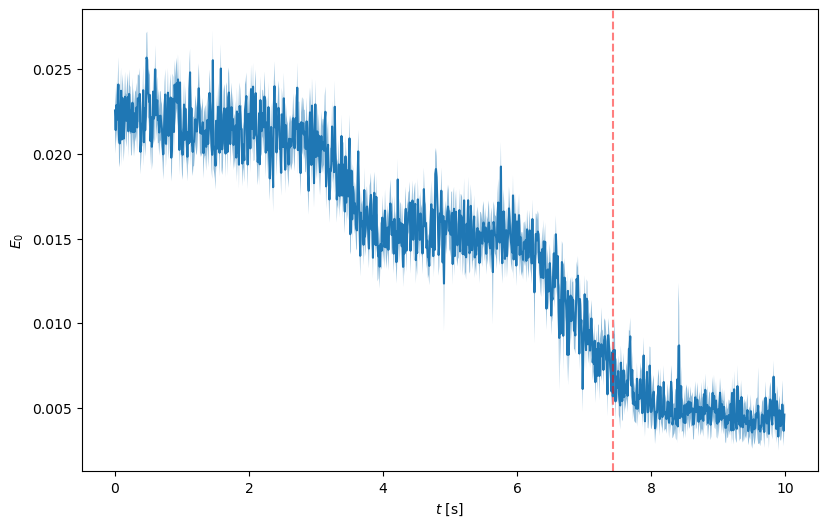

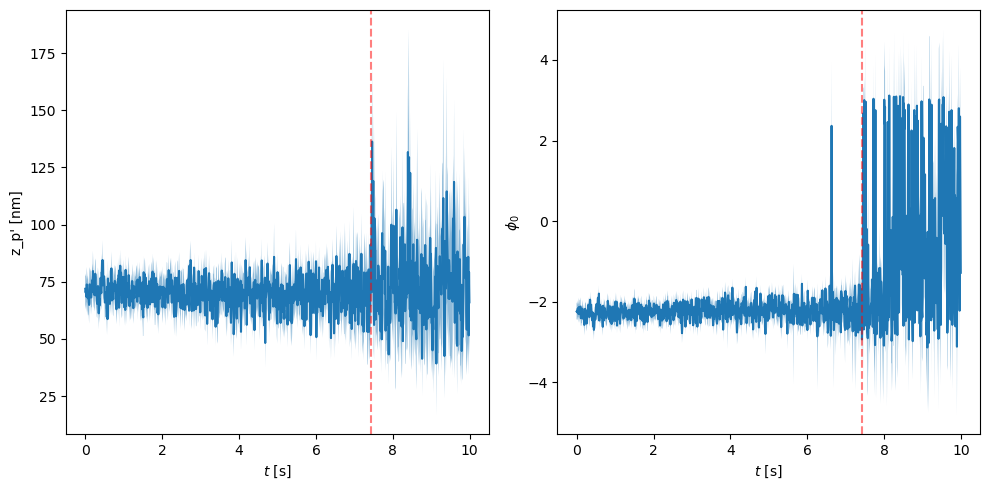

In [31]:
import pickle
    
#LOAD DATA
file = Path.cwd() / Path('data/summaries_lambda2_vzpp.pyob')
with open(file,"rb") as fp:
    summaries=pickle.load(fp)
    fp.close()

file =  Path.cwd() / Path('data/corrected_phi0s_lambda2_vzpp.pyob')
with open(file,"rb") as fp:
    corrected_phi0s=pickle.load(fp)
    fp.close()

dt=0.01 #seconds

frame_off = 743;

#PLOT
E0_means=np.array([summary['mean']['E0'] for summary in summaries])
E0_sds=np.array([summary['sd']['E0'] for summary in summaries])

plt.figure()
plt.plot(np.arange(len(E0_means))*dt,E0_means)
plt.fill_between(np.arange(len(E0_means))*dt, E0_means-E0_sds, E0_means+E0_sds, alpha=0.5)
plt.ylabel('$E_0$')
plt.xlabel('$t$ [s]')
plt.axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')

plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))

zpp_means=np.array([summary['mean']['zpp'] for summary in summaries])
zpp_sds=np.array([summary['sd']['zpp'] for summary in summaries])

axs[0].plot(np.arange(len(zpp_means))*dt,zpp_means)
axs[0].fill_between(np.arange(len(zpp_means))*dt, zpp_means-zpp_sds, zpp_means+zpp_sds, alpha=0.5)
axs[0].set_ylabel('z_p\' [nm]')
axs[0].set_xlabel('$t$ [s]')
axs[0].axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')
                  
corrected_phi0s=np.array(corrected_phi0s)
phi0_means = corrected_phi0s[:,0]
phi0_sds = corrected_phi0s[:,1]

axs[1].plot(np.arange(len(phi0_means))*dt,phi0_means)
axs[1].fill_between(np.arange(len(phi0_means))*dt, phi0_means-phi0_sds, phi0_means+phi0_sds, alpha=0.5)
axs[1].set_ylabel('$\\phi_0$')
axs[1].set_xlabel('$t$ [s]')
axs[1].axvline(frame_off*dt,color='r',alpha=0.5,linestyle='--')

fig.tight_layout()
plt.show()